In [4]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
exposure_df = pd.read_csv("./data/AI Exposure Scores/occ_level.csv")

In [4]:
exposure_df['average_rating_beta'] = (exposure_df['dv_rating_beta'] + exposure_df['human_rating_beta'])/2

In [19]:
exposure_df.head()

O*NET-SOC Code                                Title  dv_rating_alpha  \
0     11-1011.00                     Chief Executives         0.100000   
1     11-1011.03        Chief Sustainability Officers         0.166667   
2     11-1021.00      General and Operations Managers         0.000000   
3     11-1031.00                          Legislators         0.033333   
4     11-2011.00  Advertising and Promotions Managers         0.000000   

   dv_rating_beta  dv_rating_gamma  human_rating_alpha  human_rating_beta  \
0        0.460000         0.820000            0.180000           0.350000   
1        0.555556         0.944444            0.055556           0.388889   
2        0.480769         0.961538            0.115385           0.384615   
3        0.400000         0.766667            0.266667           0.516667   
4        0.476744         0.953488            0.255814           0.546512   

   human_rating_gamma  
0            0.520000  
1            0.722222  
2            0.653846  
3            0.766667  
4            0.837209

In [5]:
exposure_df.columns

Index(['O*NET-SOC Code', 'Title', 'dv_rating_alpha', 'dv_rating_beta',
       'dv_rating_gamma', 'human_rating_alpha', 'human_rating_beta',
       'human_rating_gamma'],
      dtype='object')

In [6]:
df_2020 = pd.read_csv(r"./data/POSTINGS_LINKEDIN_SG/SG-2020.csv")
df_2021 = pd.read_csv(r"./data/POSTINGS_LINKEDIN_SG/SG-2021.csv")
df_2022 = pd.read_csv(r"./data/POSTINGS_LINKEDIN_SG/SG-2022.csv")
df_2023 = pd.read_csv(r"./data/POSTINGS_LINKEDIN_SG/SG-2023.csv")
df_2024 = pd.read_csv(r"./data/POSTINGS_LINKEDIN_SG/SG-2024.csv")

In [8]:
len(df_2023[(df_2023['post_date'] <= '2023-02-28') & (df_2023['post_date'] > '2023-01-31')]['job_id'].unique())

82478

In [7]:
data_df = pd.concat([df_2021, df_2022, df_2023, df_2024])

In [6]:
data_df.head()

job_id      rcid                      company  \
0  14724496965     97982          Ambition Group Ltd.   
1  14695350894  93210878                        ITCAN   
2  14700553041     55753  Rotary Engineering Pte Ltd.   
3  14710442864   1155135           Ethos Beathchapman   
4  14733939504  93426666                         CEVA   

                                rics_k50  \
0               Human Resources Services   
1                      Business Services   
2  Engineering and Construction Services   
3               Human Resources Services   
4           Logistics and Transportation   

                                     rics_k200  \
0             Employment and Staffing Services   
1                            Business Services   
2  Civil Engineering and Construction Services   
3             Employment and Staffing Services   
4              Logistics and Delivery Services   

                                     rics_k400  \
0            Recruitment and Staffing Services   
1                            Business Services   
2  Civil Engineering and Construction Services   
3            Recruitment and Staffing Services   
4               Logistics and Courier Services   

                                     title_raw  \
0                 Business Development Manager   
1  #SGUnitedJobs SCCM ( Client Services Lead )   
2                 Business Development Manager   
3          Regional IT Auditor – European Bank   
4                     Customer Program Manager   

                           title_translated  \
0              business development manager   
1  sgunitedjobs sccm  client services lead    
2              business development manager   
3        regional it auditor  european bank   
4                  customer program manager   

                            role_k10                        role_k25  \
0  Sales and Marketing Professionals  Sales and Business Development   
1        Clinical Care Professionals     Clinical Care Professionals   
2  Sales and Marketing Professionals  Sales and Business Development   
3      Software and IT Professionals   IT Support and Infrastructure   
4      Software and IT Professionals  Project and Product Leadership   

                      role_k50                    role_k100  \
0  Business Strategy Executive  Business Strategy Executive   
1   Patient Care Professionals     Nursing and Patient Care   
2  Business Strategy Executive  Business Strategy Executive   
3  Cybersecurity Professionals  Cybersecurity Professionals   
4    Project Management Leader    Project Management Leader   

                         role_k150                           role_k250  \
0  Business Development Strategist        Business Development Manager   
1         Nursing and Patient Care  Medical Support and Care Providers   
2  Business Development Strategist        Business Development Manager   
3      Cybersecurity Professionals         Cybersecurity Professionals   
4    Project Management Leadership               Agile Program Manager   

                         role_k500                    role_k1000  \
0     Business Development Manager  Business Development Manager   
1  Emergency Medical Professionals  Emergency Medical Responders   
2     Business Development Manager  Business Development Manager   
3         Cybersecurity Management     Cybersecurity Specialists   
4                  Program Manager  Technical Program Management   

                      role_k1500                    role_k2500  \
0   Business Development Manager  Business Development Manager   
1   Emergency Medical Responders  Emergency Medical Responders   
2   Business Development Manager  Business Development Manager   
3         Cybersecurity Analysts        Cybersecurity Analysts   
4  Technology Program Management  Technical Program Management   

                     role_k5000                       role_k10000  \
0  Business Development Manager      Regional Business Developers   
1  Emergency 

In [26]:
data_df[data_df['rics_k50'] == 'Information Technology Services']

job_id      rcid                            company  \
5               14716970202    632888                  Snaphunt Pte Ltd.   
13              14704483706   1355404                HR Exchange Network   
17              14704869061    867805                        SpotX, Inc.   
29              14705266726  98164462                      Rogue Digital   
32              14701662344  12851211                     Orange Digital   
...                     ...       ...                                ...   
803873  2084583841112851611  93591451                    Windranger Labs   
803883          14789581288    999336  Singapore Telecommunications Ltd.   
803885  4710856090845383161  93292330                     ABM Industries   
803888  6658018287448848615  22236088              AlpSoft Group of Cos.   
803892  2154040701055821814    373045          Hemmersbach GmbH & Co. KG   

                               rics_k50  \
5       Information Technology Services   
13      Information Technology Services   
17      Information Technology Services   
29      Information Technology Services   
32      Information Technology Services   
...                                 ...   
803873  Information Technology Services   
803883  Information Technology Services   
803885  Information Technology Services   
803888  Information Technology Services   
803892  Information Technology Services   

                                        rics_k200  \
5                     Online Employment Platforms   
13                     Digital Analytics Software   
17                     Digital Analytics Software   
29                Information Technology Services   
32            Enterprise Software and IT Services   
...                                           ...   
803873            Information Technology Services   
803883  Information and Communications Technology   
803885            Information Technology Services   
803888            Information Technology Services   
803892        Enterprise Software and IT Services   

                                                rics_k400  \
5                             Online Employment Platforms   
13                          Market Research and Analytics   
17                        Digital Marketing and Analytics   
29                       Information Technology Solutions   
32                    Enterprise Software and IT Services   
...                                                   ...   
803873                Information Technology and Services   
803883  Information and Communications Technology Serv...   
803885                Information Technology and Services   
803888                   Information Technology Solutions   
803892                   Software and Technology Services   

                                         title_raw  \
5                    Business Development Director   
13                               Interior Designer   
17                  Solutions Engineer (Singapore)   
29                  Digital Media Buying Executive   
32      Administrative Associate (2 year contract)   
...                                            ...   
803873               Corporate Communications Lead   
803883                   Associate, Ops Excellence   
803885                            Executive Chef-A   
803888                          IC Design Engineer   
803892                  Senior Project Engineer II   

                                title_translated  \
5                  business development director   
13                             interior designer   
17                  solutions engineer singapore   
29                digital media buying executive   
32      administrative associate 2 year contract   
...                                          ...   
803873             corporate communications lead   
803883                 associate, ops excellence   
803885                          executive chef a   
803888                        ic design engineer   


In [7]:
data_df.columns

Index(['job_id', 'rcid', 'company', 'rics_k50', 'rics_k200', 'rics_k400',
       'title_raw', 'title_translated', 'role_k10', 'role_k25', 'role_k50',
       'role_k100', 'role_k150', 'role_k250', 'role_k500', 'role_k1000',
       'role_k1500', 'role_k2500', 'role_k5000', 'role_k10000', 'role_k15000',
       'mapped_role', 'location_raw', 'region', 'country', 'state',
       'metro_area', 'salary', 'post_date', 'remove_date',
       'ultimate_parent_rcid', 'ultimate_parent_company_name', 'onet_code',
       'onet_title', 'remote_type', 'jobtitle', 'description', 'salary_min',
       'salary_max', 'salary_predicted'],
      dtype='object')

## Comparing specific occupations with high vs. low GenAI exposure (descriptive)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_onet_divergence(
    data_df: pd.DataFrame,
    exposure_df: pd.DataFrame,
    onet_high: str,
    onet_low: str,
    start_date: str = "2022-01-01",
    end_date: str = "2024-12-31",
):
    """
    Plot quarterly job postings for two O*NET occupations (one high, one low GenAI exposure)
    from 2022-01-01 to 2024-12-31, with a vertical line at 2023Q1.
    """

    # -----------------------------
    # 1. Helper: keep decimals, only trim whitespace
    # -----------------------------
    def norm_onet(code):
        if pd.isna(code):
            return None
        return str(code).strip()   # DO NOT modify decimals

    onet_high = norm_onet(onet_high)
    onet_low = norm_onet(onet_low)

    # -----------------------------
    # 2. Identify the relevant columns safely
    # -----------------------------
    # data_df O*NET column
    if "onet_code" not in data_df.columns:
        raise KeyError(f"'onet_code' column not found in data_df. Available columns: {list(data_df.columns)}")

    # exposure_df O*NET column – try to find 'O*NET-SOC Code' or similar
    exposure_code_col = None
    for col in exposure_df.columns:
        if "O*NET-SOC Code" in col:
            exposure_code_col = col
            break
    if exposure_code_col is None:
        raise KeyError(
            "Could not find an O*NET code column in exposure_df (expected something like 'O*NET-SOC Code'). "
            f"Available columns: {list(exposure_df.columns)}"
        )

    # -----------------------------
    # 3. Copy & normalise codes (preserving decimals)
    # -----------------------------
    data_df = data_df.copy()
    exposure_df = exposure_df.copy()

    data_df["onet_code_norm"] = data_df["onet_code"].apply(norm_onet)
    exposure_df["onet_code_norm"] = exposure_df[exposure_code_col].apply(norm_onet)

    # -----------------------------
    # 3b. Create average_rating_beta if missing
    # -----------------------------
    # Use the mean of dv_rating_beta and human_rating_beta (row-wise)
    if "average_rating_beta" not in exposure_df.columns:
        missing = [c for c in ["dv_rating_beta", "human_rating_beta"] if c not in exposure_df.columns]
        if missing:
            raise KeyError(
                f"Cannot construct average_rating_beta because columns are missing: {missing}. "
                f"Available columns in exposure_df: {list(exposure_df.columns)}"
            )
        exposure_df["average_rating_beta"] = exposure_df[["dv_rating_beta", "human_rating_beta"]].mean(axis=1)

    # -----------------------------
    # 4. Look up titles and exposure scores for legend labels
    # -----------------------------
    exposure_map = (
        exposure_df.set_index("onet_code_norm")[["Title", "average_rating_beta"]]
        .to_dict(orient="index")
    )

    # fallback titles from data_df if O*NET titles missing in exposure_df
    if "onet_title" in data_df.columns:
        title_map_data = (
            data_df.dropna(subset=["onet_title"])
            .drop_duplicates(subset=["onet_code_norm"])
            .set_index("onet_code_norm")["onet_title"]
            .to_dict()
        )
    else:
        title_map_data = {}

    def make_label(code: str):
        info = exposure_map.get(code)
        if info is not None and pd.notna(info.get("average_rating_beta")):
            return f"{info['Title']} (AI exp: {info['average_rating_beta']:.2f})"
        # fall back to data_df title or raw code
        if code in title_map_data:
            return title_map_data[code]
        return code

    # -----------------------------
    # 5. Filter by date range and the two O*NET codes
    # -----------------------------
    data_df["post_date"] = pd.to_datetime(data_df["post_date"], errors="coerce")

    mask_dates = (data_df["post_date"] >= pd.to_datetime(start_date)) & \
                 (data_df["post_date"] <= pd.to_datetime(end_date))
    mask_codes = data_df["onet_code_norm"].isin([onet_high, onet_low])

    df_sub = data_df[mask_dates & mask_codes].copy()

    if df_sub.empty:
        raise ValueError(
            "No postings found for the selected O*NET codes in the given period.\n"
            f"Codes: {onet_high}, {onet_low}; Period: {start_date} to {end_date}"
        )

    # -----------------------------
    # 6. Aggregate to quarters
    # -----------------------------
    df_sub["quarter"] = df_sub["post_date"].dt.to_period("Q")

    grouped = (
        df_sub.groupby(["quarter", "onet_code_norm"])
        .size()
        .unstack("onet_code_norm")
    )

    # Ensure all quarters between 2022Q1 and 2024Q4 are present
    full_quarters = pd.period_range("2022Q1", "2024Q4", freq="Q")
    grouped = grouped.reindex(full_quarters, fill_value=0)

    # Convert PeriodIndex to timestamps for plotting
    grouped_ts = grouped.copy()
    grouped_ts.index = grouped_ts.index.to_timestamp(how="start")

    # -----------------------------
    # 7. Build labels
    # -----------------------------
    label_high = make_label(onet_high)
    label_low = make_label(onet_low)

    # -----------------------------
    # 8. Plot
    # -----------------------------
    fig, ax = plt.subplots(figsize=(10, 5))

    if onet_high in grouped_ts.columns:
        ax.plot(grouped_ts.index, grouped_ts[onet_high], marker="o", label=label_high)
    else:
        print(f"Warning: no data for high-exposure code {onet_high} in grouped results.")

    if onet_low in grouped_ts.columns:
        ax.plot(grouped_ts.index, grouped_ts[onet_low], marker="o", label=label_low)
    else:
        print(f"Warning: no data for low-exposure code {onet_low} in grouped results.")

    # Vertical line at 2023Q1
    event_date = pd.to_datetime("2023-01-01")
    ax.axvline(event_date, linestyle="--")
    ymax = ax.get_ylim()[1]
    ax.text(
        event_date,
        ymax,
        "",
        va="top",
        ha="left",
        rotation=90,
    )

    ax.set_title("Quarterly Job Postings for Two O*NET Occupations (2022–2024)")
    ax.set_xlabel("Quarter")
    ax.set_ylabel("Number of job postings")
    ax.legend()
    ax.grid(True, linestyle=":", alpha=0.7)
    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

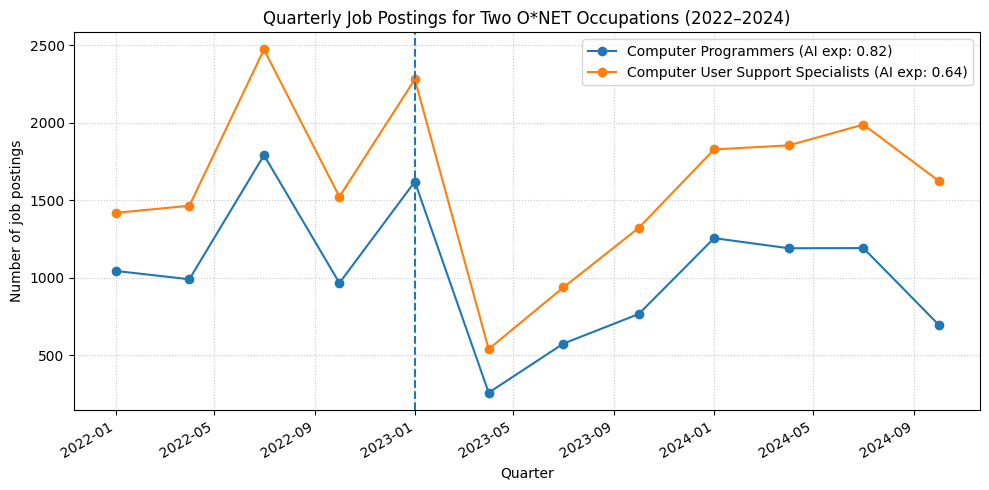

In [28]:
plot_onet_divergence(
    data_df=data_df,
    exposure_df=exposure_df,
    onet_high="15-1251.00",   # example: Computer Programmers
    onet_low="15-1232.00"     # example: Computer User Support Specialists
)

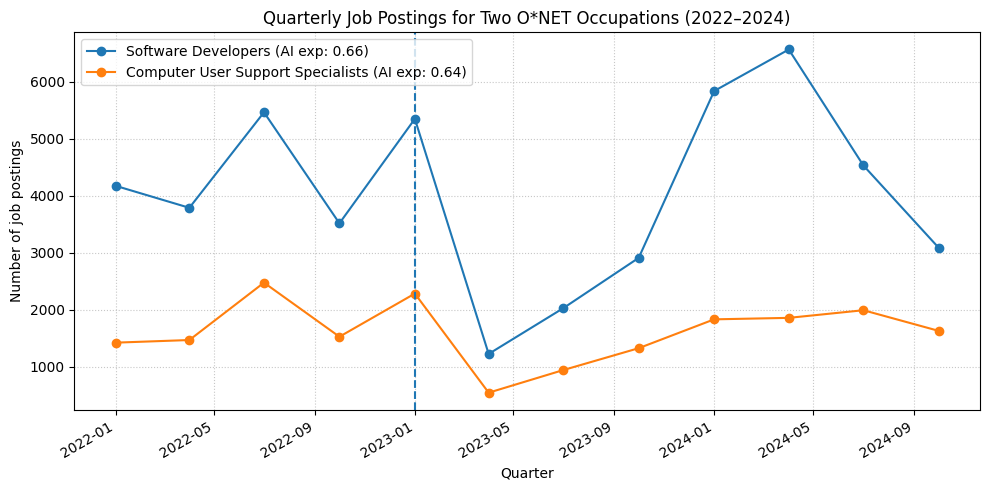

In [19]:
plot_onet_divergence(
    data_df=data_df,
    exposure_df=exposure_df,
    onet_high="15-1252.00",   # example: Computer Programmers
    onet_low="15-1232.00"     # example: Computer User Support Specialists
)

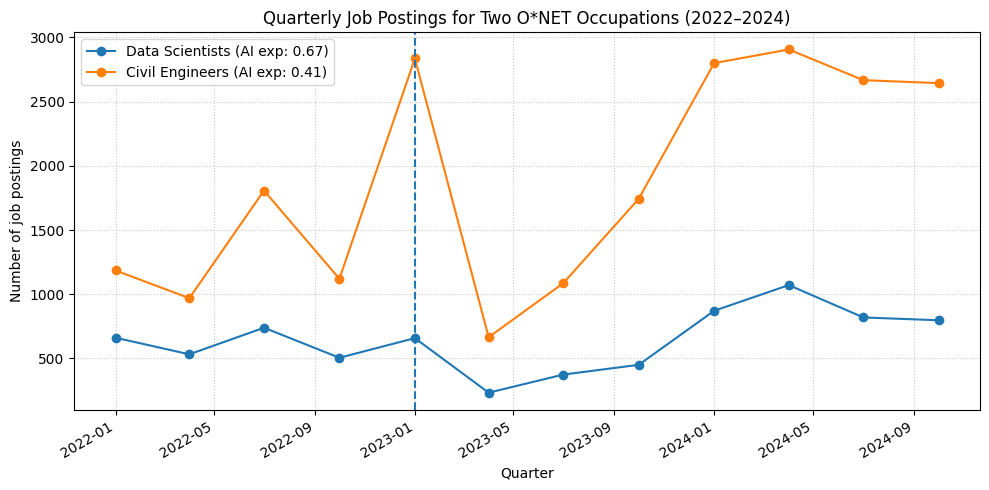

In [ ]:
plot_onet_divergence(
    data_df=data_df,
    exposure_df=exposure_df,
    onet_high="15-2051.00",
    onet_low="17-2051.00" 
)

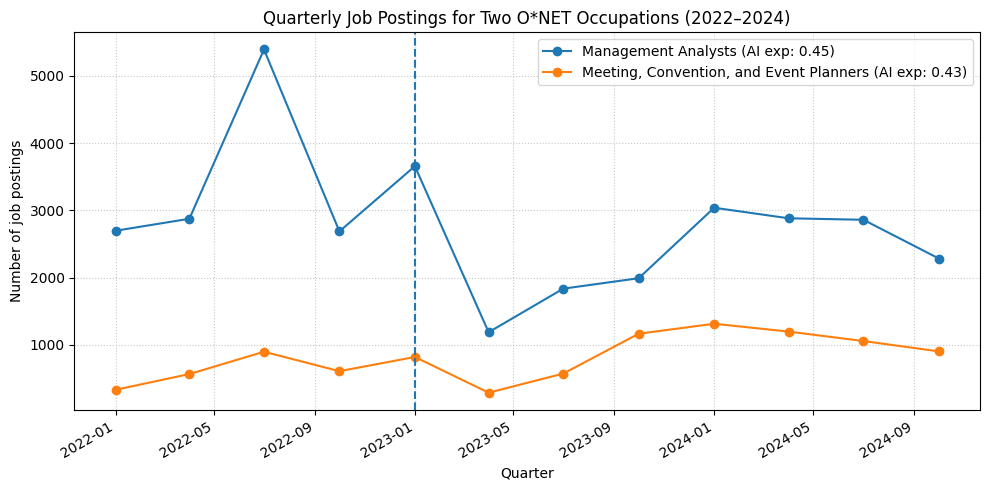

In [25]:
plot_onet_divergence(
    data_df=data_df,
    exposure_df=exposure_df,
    onet_high="13-1111.00", 
    onet_low="13-1121.00"
)

# DiD Regression

Creating panel for DiD without industry fixed effects

In [13]:
# ---------- Panel construction for DiD analysis ----------
scored_df_full = scored_df_full.copy()
scored_df_full['post_date'] = pd.to_datetime(scored_df_full['post_date'], errors='coerce')
scored_df_full = scored_df_full.dropna(subset=['post_date', 'rics_k50', 'onet_code'])
scored_df_full['month'] = scored_df_full['post_date'].dt.to_period('M').dt.to_timestamp()

# Keep only rows with exposure (CRITICAL - you need this for treatment definition)
scored_df_full = scored_df_full[scored_df_full['ai_exposure'].notna()].copy()

# Aggregate to occupation × industry × month
g = (scored_df_full
     .groupby(['onet_code','rics_k50','month'], as_index=False)
     .size()
     .rename(columns={'size':'postings'})
)

# Full panel with zeros
all_o = g['onet_code'].unique()
all_i = g['rics_k50'].unique()
all_t = pd.period_range(g['month'].min(), g['month'].max(), freq='M').to_timestamp()
panel = (pd.MultiIndex.from_product([all_o, all_i, all_t],
                                    names=['onet_code','rics_k50','month'])
         .to_frame(index=False))
panel = panel.merge(g, on=['onet_code','rics_k50','month'], how='left')
panel['postings'] = panel['postings'].fillna(0)

# Bring exposure (it's one per onet_code)
panel = panel.merge(exp[['onet_code','ai_exposure']], on='onet_code', how='left')

# ---------- KEY CHANGES START HERE ----------

# 1. Define treatment timing (adjust this date based on when GenAI was released)
#    Common choices: Nov 2022 (ChatGPT), or Jan 2023 for clean year break
cutoff = pd.Timestamp('2022-12-01')  # ChatGPT release
# cutoff = pd.Timestamp('2023-01-01')  # Alternative: clean year break

panel['post'] = (panel['month'] >= cutoff).astype(int)

# 2. Define treatment groups - HIGH vs LOW exposure
#    This is your "treated" dimension
panel['high_exposure'] = (panel['ai_exposure'] >= panel['ai_exposure'].median()).astype(int)

# Alternative: Use top/bottom terciles (more conservative, drops middle)
# terciles = panel['ai_exposure'].quantile([1/3, 2/3])
# panel = panel[(panel['ai_exposure'] <= terciles.iloc[0]) | 
#               (panel['ai_exposure'] >= terciles.iloc[1])].copy()
# panel['high_exposure'] = (panel['ai_exposure'] >= terciles.iloc[1]).astype(int)

# 3. Create the interaction term (this is your DiD coefficient)
panel['high_x_post'] = panel['high_exposure'] * panel['post']

# 4. Outcome variable
panel['log_postings'] = np.log1p(panel['postings'])

# 5. Create categorical exposure for diagnostics and plotting
panel['exp_group'] = pd.qcut(panel['ai_exposure'], 2, labels=['Low','High'], duplicates='drop')

# ---------- DIAGNOSTICS ----------
print("\n=== Panel Summary ===")
print(f"Observations: {len(panel):,}")
print(f"Occupations: {panel['onet_code'].nunique()}")
print(f"Industries: {panel['rics_k50'].nunique()}")
print(f"Months: {panel['month'].nunique()}")
print(f"Date range: {panel['month'].min()} to {panel['month'].max()}")
print(f"\nCutoff date: {cutoff}")

print("\n=== Treatment Distribution ===")
print(panel.groupby(['high_exposure','post']).size().unstack(fill_value=0))

print("\n=== Exposure Summary ===")
print(panel['ai_exposure'].describe())

print("\n=== Balance Check (pre-period) ===")
pre = panel[panel['post']==0]
print(pre.groupby('high_exposure')['postings'].agg(['mean','median','count']))

print("\n=== Outcome Summary ===")
print(panel[['postings','log_postings']].describe())

print("\n=== Sample ===")
print(panel[['onet_code','rics_k50','month','postings','log_postings',
             'ai_exposure','high_exposure','post','high_x_post']].head(10))


=== Panel Summary ===
Observations: 916,800
Occupations: 382
Industries: 50
Months: 48
Date range: 2021-01-01 00:00:00 to 2024-12-01 00:00:00

Cutoff date: 2022-12-01 00:00:00

=== Treatment Distribution ===
post                0       1
high_exposure                
0              218500  237500
1              220800  240000

=== Exposure Summary ===
count    916800.000000
mean          0.403846
std           0.197583
min           0.000000
25%           0.261905
50%           0.437500
75%           0.545455
max           0.860000
Name: ai_exposure, dtype: float64

=== Balance Check (pre-period) ===
                   mean  median   count
high_exposure                          
0              1.004755     0.0  218500
1              2.998687     0.0  220800

=== Outcome Summary ===
            postings   log_postings
count  916800.000000  916800.000000
mean        2.457468       0.424833
std        16.474097       0.844683
min         0.000000       0.000000
25%         0.000000      

In [56]:
# --- Python (pandas) ---
df = panel.copy()

# Ensure keys/outcome exist
assert {'entity_id','month','log_postings','high_exposure'}.issubset(df.columns)

# String month for Stata conversion
df['month_str'] = df['month'].dt.strftime('%Y-%m')   # e.g., "2022-12"

# (Optional) integer month index relative to 1960m1 if you prefer numeric export
df['month_index_1960'] = (df['month'].dt.year - 1960)*12 + (df['month'].dt.month - 1)

# Keep only needed columns
keep_cols = ['entity_id','rics_k50','log_postings','post','high_exposure',
             'month_str','month_index_1960','ai_exposure','postings']
out = df[keep_cols].copy()

# Stata likes int/float for FE ids; cast if you can
# out['entity_id'] = out['entity_id'].astype('int64', errors='ignore')

# Write .dta (version 118 works well with modern Stata)
out.to_stata('panel_for_stata.dta', write_index=False, version=118)

Creating panel for DiD with industry fixed effects

In [15]:
# Create the panel dataset for DiD analysis
def create_did_panel(df, treatment_date='2022-12-01'):
    """
    Creates a panel dataset for difference-in-differences analysis
    
    Parameters:
    - df: Input dataframe
    - treatment_date: Date of ChatGPT release (treatment)
    """
    
    # Make a copy to avoid modifying original
    panel_df = df.copy()
    
    # Convert dates to datetime
    panel_df['month'] = pd.to_datetime(panel_df['month'])
    treatment_date = pd.to_datetime(treatment_date)
    
    # Create treatment indicator (Post)
    panel_df['post'] = (panel_df['month'] >= treatment_date).astype(int)
    
    # Create high AI exposure indicator based on median
    median_ai = panel_df['ai_exposure'].median()
    panel_df['high_ai'] = (panel_df['ai_exposure'] >= median_ai).astype(int)
    
    # Create interaction term
    panel_df['post_x_high_ai'] = panel_df['post'] * panel_df['high_ai']
    
    # Aggregate to industry-month-AI exposure level
    # This creates a proper panel structure
    panel_agg = panel_df.groupby(['rics_k50', 'month', 'high_ai']).agg({
        'job_id': 'count',  # Count of job postings
        'ai_exposure': 'mean',  # Average AI exposure
        'post': 'first'  # Post indicator (same for all in group)
    }).reset_index()
    
    # Rename columns
    panel_agg.rename(columns={
        'job_id': 'num_postings',
        'rics_k50': 'industry'
    }, inplace=True)
    
    # Create log of postings (add 1 to avoid log(0))
    panel_agg['log_postings'] = np.log(panel_agg['num_postings'] + 1)
    
    # Create interaction term in aggregated data
    panel_agg['post_x_high_ai'] = panel_agg['post'] * panel_agg['high_ai']
    
    # Create time trend (months since start)
    min_date = panel_agg['month'].min()
    panel_agg['time_trend'] = ((panel_agg['month'] - min_date).dt.days / 30.44).astype(int)
    
    # Sort by industry, AI exposure level, and month
    panel_agg.sort_values(['industry', 'high_ai', 'month'], inplace=True)
    
    return panel_agg, median_ai

# Create the panel
panel_data, median_ai_exposure = create_did_panel(scored_df_full)

# Display summary statistics
print("=" * 80)
print("PANEL DATASET SUMMARY")
print("=" * 80)
print(f"\nMedian AI Exposure: {median_ai_exposure:.4f}")
print(f"\nPanel Dimensions:")
print(f"  - Industries: {panel_data['industry'].nunique()}")
print(f"  - Time periods: {panel_data['month'].nunique()}")
print(f"  - Total observations: {len(panel_data)}")

print("\n" + "=" * 80)
print("PRE vs POST Treatment Comparison")
print("=" * 80)
pre_post = panel_data.groupby(['post', 'high_ai'])['num_postings'].agg(['count', 'mean', 'sum'])
print(pre_post)

print("\n" + "=" * 80)
print("PREVIEW OF PANEL DATA")
print("=" * 80)
print(panel_data.head(20))

print("\n" + "=" * 80)
print("VARIABLE DESCRIPTIONS")
print("=" * 80)
print(panel_data.dtypes)
print("\n")
print(panel_data.describe())

# Save to Stata format
panel_data.to_stata('did_panel_ai_exposure.dta', write_index=False)
print("\n" + "=" * 80)
print("✓ Panel data saved to: did_panel_ai_exposure.dta")
print("=" * 80)

# # Print recommended regression specifications
# print("\n" + "=" * 80)
# print("RECOMMENDED STATA REGRESSION SPECIFICATIONS")
# print("=" * 80)

# print("""
# BASELINE DiD SPECIFICATION:
# ---------------------------
# reg log_postings post_x_high_ai post high_ai i.industry i.time_trend, robust

# Or with industry-month fixed effects:
# reg log_postings post_x_high_ai high_ai i.industry#i.time_trend, robust

# Or using xtreg with panel structure:
# xtset industry month
# xtreg log_postings post_x_high_ai post high_ai i.time_trend, fe robust

# PARALLEL TRENDS TEST:
# ---------------------
# Generate leads and lags around treatment:
# gen months_to_treat = time_trend - time_trend_at_treatment
# xi: reg log_postings i.months_to_treat*high_ai i.industry i.time_trend if months_to_treat >= -12 & months_to_treat <= 12, robust

# INTERPRETATION:
# ---------------
# - Coefficient on post_x_high_ai is the DiD estimate
# - This captures differential effect of ChatGPT on high vs low AI exposure occupations
# - post: captures common time trend after treatment
# - high_ai: captures time-invariant differences between high/low AI exposure
# - Industry FE: controls for industry-specific levels
# - Time FE: controls for common time shocks

# KEY VARIABLES:
# --------------
# - log_postings: Log of (number of job postings + 1)
# - post: = 1 if month >= Dec 2022, 0 otherwise
# - high_ai: = 1 if AI exposure >= median, 0 otherwise
# - post_x_high_ai: DiD interaction term (treatment effect)
# - industry: Industry identifier (RICS k50)
# - time_trend: Linear time trend (months from start)
# """)

PANEL DATASET SUMMARY

Median AI Exposure: 0.5104

Panel Dimensions:
  - Industries: 50
  - Time periods: 48
  - Total observations: 4678

PRE vs POST Treatment Comparison
              count        mean     sum
post high_ai                           
0    0         1088  376.326287  409443
     1         1091  432.819432  472206
1    0         1249  564.076061  704531
     1         1250  533.461600  666827

PREVIEW OF PANEL DATA
                 industry      month  high_ai  num_postings  ai_exposure  \
0   Aerospace and Defense 2021-01-01        0            12     0.407747   
2   Aerospace and Defense 2021-02-01        0             8     0.349477   
4   Aerospace and Defense 2021-03-01        0           203     0.376596   
6   Aerospace and Defense 2021-04-01        0           238     0.393238   
8   Aerospace and Defense 2021-05-01        0           214     0.384858   
10  Aerospace and Defense 2021-06-01        0           261     0.392592   
12  Aerospace and Defense 2021-07

In [21]:
# Version 2 where entity is OCC X INDUSTRY
# Unit of observation is OCC X INDUSTRY X MONTH

def create_did_panel_occind(df, treatment_date='2022-12-01',
                            occ_col='onet_code', ind_col='rics_k50',
                            date_col='month', id_col='job_id',
                            exposure_col='ai_exposure',
                            out_path='did_panel_occind.dta'):
    """
    Build occ×industry×month panel with:
      - entity = occ×industry
      - post = 1[month >= treatment_date]
      - high_ai_pre based on PRE-period occupation-level median exposure
    Saves a Stata .dta at out_path and returns (panel, overall_pre_median).
    """

    # --- base
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    treatment_date = pd.to_datetime(treatment_date)
    df = df.dropna(subset=[occ_col, ind_col, date_col, exposure_col])

    # --- PRE-PERIOD occupation-level median exposure
    pre = df[df[date_col] < treatment_date].copy()
    occ_median_pre = pre.groupby(occ_col)[exposure_col].median().rename('exposure_pre')
    overall_pre_median = occ_median_pre.median()  # the split threshold

    # merge back; drop rows for occupations never seen pre-period (cannot classify)
    df = df.merge(occ_median_pre, on=occ_col, how='left')
    df = df[~df['exposure_pre'].isna()].copy()

    # High/Low is fixed at the occupation level using PRE values
    df['high_ai_pre'] = (df['exposure_pre'] >= overall_pre_median).astype(int)

    # --- timing
    df['post'] = (df[date_col] >= treatment_date).astype(int)
    df['year'] = df[date_col].dt.year
    df['mo'] = df[date_col].dt.month  # month-of-year (1..12)

    # --- aggregate to occ×industry×month (counts of postings)
    g = df.groupby([occ_col, ind_col, date_col], as_index=False).agg(
        num_postings=(id_col, 'count'),
        post=('post', 'first'),
        year=('year', 'first'),
        mo=('mo', 'first'),
        # carry occupation-level classification (constant within occ)
        high_ai_pre=('high_ai_pre', 'first'),
        exposure_pre=('exposure_pre', 'first')
    )

    # log(y+1)
    g['log_postings'] = np.log(g['num_postings'] + 1)

    # helpful IDs for Stata
    g = g.rename(columns={occ_col: 'occ', ind_col: 'industry', date_col: 'month'})
    g['eid_str'] = g['occ'].astype(str) + '::' + g['industry'].astype(str)  # occ×industry label

    # Stata likes tm-format monthly IDs; keep both date and parts
    g = g.sort_values(['occ', 'industry', 'month']).reset_index(drop=True)

    # save
    g.to_stata(out_path, write_index=False)
    print(f"✓ Saved panel to {out_path}")
    print(f"Occupations with PRE data: {g['occ'].nunique()}, entities (occ×industry): {g['eid_str'].nunique()}, periods: {g['month'].nunique()}")
    print(f"Overall PRE-period median exposure (split): {overall_pre_median:.4f}")
    return g, overall_pre_median

# --- run it
panel_data, pre_med = create_did_panel_occind(
    scored_df_full,
    treatment_date='2022-12-01',
    occ_col='onet_code',          # <-- change if your occ variable is named differently
    ind_col='rics_k50',
    date_col='month',
    id_col='job_id',
    exposure_col='ai_exposure',
    out_path='did_panel_occind.dta'
)

✓ Saved panel to did_panel_occind.dta
Occupations with PRE data: 382, entities (occ×industry): 14367, periods: 48
Overall PRE-period median exposure (split): 0.4375


In [25]:
# Version 3: OCC X INDUSTRY X MONTH UNIT OF OBSERVATION
# KEEP 0 MONTHS

def create_did_panel_occind_v3(
    df,
    treatment_date='2022-12-01',
    occ_col='onet_code',
    ind_col='rics_k50',
    date_col='month',       # monthly timestamp or any daily date; will be parsed
    id_col='job_id',
    exposure_col='ai_exposure',
    freq='Q',               # 'Q' for quarter (calendar), 'M' for month
    quarterly_post='2023Q1',# when freq='Q': choose '2022Q4' (partial) or '2023Q1' (clean)
    out_path='did_panel_occind.dta'
):
    """
    Build occ×industry×(month|quarter) panel with:
      - entity = occ×industry
      - supports monthly or quarterly aggregation
      - full grid (zero-posting cells included)
      - high_ai_pre fixed using PRE-period occupation-level median exposure
      - post defined from treatment_date (monthly) or quarterly_post (quarterly)
    Saves a Stata .dta at out_path and returns (panel_df, pre_median_exposure).
    """

    # --- base / parse
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    treatment_dt = pd.to_datetime(treatment_date)
    df = df.dropna(subset=[occ_col, ind_col, date_col, exposure_col])

    # --- PRE-PERIOD occupation-level median exposure (computed on raw dates)
    pre = df[df[date_col] < treatment_dt].copy()
    occ_median_pre = pre.groupby(occ_col)[exposure_col].median().rename('exposure_pre')
    overall_pre_median = occ_median_pre.median()

    # merge back; drop rows for occupations never seen pre-period (cannot classify)
    df = df.merge(occ_median_pre, on=occ_col, how='left')
    df = df[~df['exposure_pre'].isna()].copy()
    df['high_ai_pre'] = (df['exposure_pre'] >= overall_pre_median).astype('int8')

    # --- choose period frequency
    if freq.upper() == 'Q':
        # calendar quarters; we'll aggregate to quarter starts (Pandas Periods)
        df['period'] = df[date_col].dt.to_period('Q').dt.start_time
        # define 'post' at quarter level:
        # option A (partial exposure): post=1 for 2022Q4 onwards
        # option B (clean): post=1 from 2023Q1 onwards
        if quarterly_post.upper() == '2022Q4':
            post_cutoff = pd.Period('2022Q4', freq='Q').start_time
        else:
            post_cutoff = pd.Period('2023Q1', freq='Q').start_time
    else:
        # monthly
        df['period'] = df[date_col].dt.to_period('M').dt.start_time

    # --- aggregate counts at occ×industry×period
    agg = (
        df.groupby([occ_col, ind_col, 'period'], as_index=False)
          .agg(num_postings=(id_col, 'count'))
    )

    # --- build full grid to keep zero-posting cells
    occs = df[occ_col].dropna().unique()
    inds = df[ind_col].dropna().unique()
    period_min = df['period'].min()
    period_max = df['period'].max()

    if freq.upper() == 'Q':
        all_periods = pd.period_range(period_min, period_max, freq='Q').to_timestamp()
    else:
        all_periods = pd.period_range(period_min, period_max, freq='M').to_timestamp()

    full_grid = (
        pd.MultiIndex.from_product([occs, inds, all_periods],
                                   names=[occ_col, ind_col, 'period'])
          .to_frame(index=False)
    )

    panel = (
        full_grid
        .merge(agg, on=[occ_col, ind_col, 'period'], how='left')
        .fillna({'num_postings': 0})
    )

    # --- attach static occupation-level tags (high_ai_pre, exposure_pre)
    panel = panel.merge(
        df[[occ_col, 'exposure_pre', 'high_ai_pre']].drop_duplicates(subset=[occ_col]),
        on=occ_col, how='left'
    )

    # --- calendar parts + post flag
    panel['year'] = panel['period'].dt.year
    if freq.upper() == 'Q':
        panel['qtr'] = panel['period'].dt.quarter.astype('int8')
        panel['post'] = (panel['period'] >= post_cutoff).astype('int8')
    else:
        panel['mo'] = panel['period'].dt.month.astype('int8')
        panel['post'] = (panel['period'] >= treatment_dt.to_period('M').start_time).astype('int8')

    # --- log(y+1)
    panel['log_postings'] = np.log(panel['num_postings'] + 1.0)

    # --- Stata-friendly naming
    panel = panel.rename(columns={
        occ_col: 'occ',
        ind_col: 'industry',
        'period': 'time'
    })

    # string entity id; sort
    panel['eid_str'] = panel['occ'].astype(str) + '::' + panel['industry'].astype(str)
    sort_keys = ['occ', 'industry', 'time']
    panel = panel.sort_values(sort_keys).reset_index(drop=True)

    # --- save
    # (We keep year & mo/qtr so you can construct %tm or %tq inside Stata safely)
    panel.to_stata(out_path, write_index=False)
    print(f"✓ Saved panel to {out_path}")
    print(f"Occs with PRE data: {panel['occ'].nunique()} | Entities: {panel['eid_str'].nunique()} | Periods: {panel['time'].nunique()}")
    print(f"Overall PRE-period median exposure (split): {overall_pre_median:.4f}")

    return panel, overall_pre_median

# --- run it
create_did_panel_occind_v3(
    scored_df_2022_onwards,
    treatment_date='2022-12-01',
    occ_col='onet_code',
    ind_col='rics_k50',
    date_col='month',       # monthly timestamp or any daily date; will be parsed
    id_col='job_id',
    exposure_col='ai_exposure',
    freq='Q',               # 'Q' for quarter (calendar), 'M' for month
    quarterly_post='2023Q1',# when freq='Q': choose '2022Q4' (partial) or '2023Q1' (clean)
    out_path='did_panel_occind_Q.dta'
)

✓ Saved panel to did_panel_occind_Q.dta
Occs with PRE data: 380 | Entities: 19000 | Periods: 12
Overall PRE-period median exposure (split): 0.4375


(               occ               industry       time  num_postings  \
 0       11-1011.00  Aerospace and Defense 2022-01-01           5.0   
 1       11-1011.00  Aerospace and Defense 2022-04-01           8.0   
 2       11-1011.00  Aerospace and Defense 2022-07-01           2.0   
 3       11-1011.00  Aerospace and Defense 2022-10-01           6.0   
 4       11-1011.00  Aerospace and Defense 2023-01-01           4.0   
 ...            ...                    ...        ...           ...   
 227995  53-7065.00      Wellness Products 2023-10-01           9.0   
 227996  53-7065.00      Wellness Products 2024-01-01          10.0   
 227997  53-7065.00      Wellness Products 2024-04-01           7.0   
 227998  53-7065.00      Wellness Products 2024-07-01          23.0   
 227999  53-7065.00      Wellness Products 2024-10-01          11.0   
 
         exposure_pre  high_ai_pre  year  qtr  post  log_postings  \
 0           0.405000            0  2022    1     0      1.791759   
 1      

✓ Saved panel to did_panel_occind_Q.dta
Occs with PRE data: 380 | Entities: 19000 | Periods: 12
Overall PRE-period median exposure (split): 0.4375


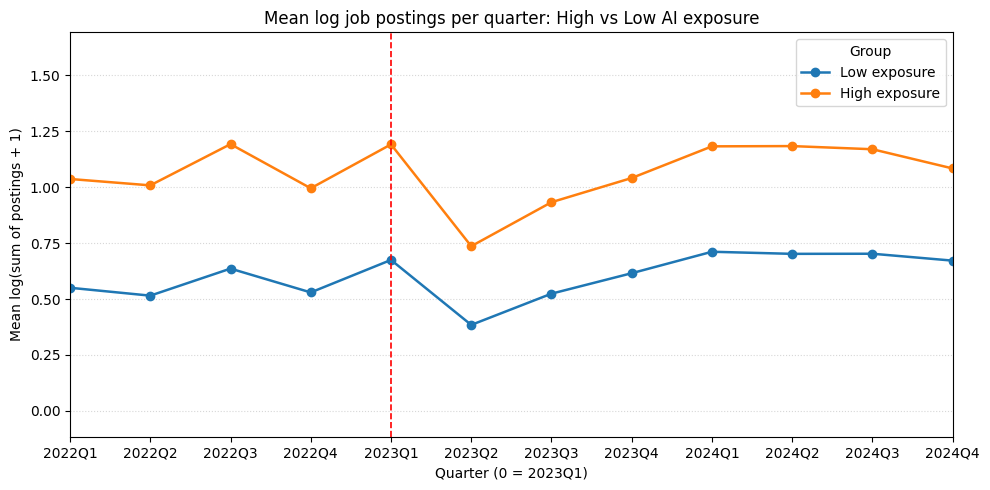

In [32]:
# ---- build the panel (you already have this)
panel_df, pre_med = create_did_panel_occind_v3(
    scored_df_2022_onwards,
    treatment_date='2022-12-01',
    occ_col='onet_code',
    ind_col='rics_k50',
    date_col='month',
    id_col='job_id',
    exposure_col='ai_exposure',
    freq='Q',
    quarterly_post='2023Q1',
    out_path='did_panel_occind_Q.dta'
)

# === Option A (recommended): log of TOTAL postings per group per quarter
# agg = (panel_df.groupby(['time','high_ai_pre'], as_index=False)['num_postings'].sum())
# agg['log_postings_q'] = np.log(agg['num_postings'] + 1.0)

# plot_df = (agg.pivot(index='time', columns='high_ai_pre', values='log_postings_q')
#               .rename(columns={0: 'Low exposure', 1: 'High exposure'})
#               .sort_index())

# (Alternative Option B: average log per entity—comment A and uncomment B if preferred)
aggB = (panel_df.groupby(['time','high_ai_pre'], as_index=False)['log_postings'].mean())
plot_df = (aggB.pivot(index='time', columns='high_ai_pre', values='log_postings')
              .rename(columns={0: 'Low exposure', 1: 'High exposure'})
              .sort_index())

ymin = plot_df.min().min(); ymax = plot_df.max().max()

pad = 0.5  # tweak as you like

# ---- Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_df.plot(ax=ax, marker='o', linewidth=1.8)

# Nice quarter labels (e.g., 2022Q4)
ax.set_xticks(plot_df.index)
ax.set_xticklabels([f"{d.year}Q{((d.month-1)//3)+1}" for d in plot_df.index], rotation=0)

# Treatment line at 2023Q1
event_dt = pd.Period('2023Q1', freq='Q').start_time
ax.axvline(event_dt, linestyle='--', linewidth=1.2, color='red')

ax.set_ylim(ymin - pad, ymax + pad)
ax.set_title('Mean log job postings per quarter: High vs Low AI exposure')
ax.set_xlabel('Quarter (0 = 2023Q1)')
ax.set_ylabel('Mean log(sum of postings + 1)')
ax.grid(True, axis='y', linestyle=':', alpha=0.5)
ax.legend(title='Group', loc='best')
plt.tight_layout()
plt.show()

In [41]:
panel_df.columns

Index(['occ', 'industry', 'time', 'num_postings', 'exposure_pre',
       'high_ai_pre', 'year', 'qtr', 'post', 'log_postings', 'eid_str'],
      dtype='object')


=== Distribution diagnostics by quarter (occ×industry×quarter) ===
quarter  N cells  zeros %  raw_skew  log1p_skew  raw_p90  raw_p99  raw_max
 2022Q1    19000     55.7 15.919579    1.671677     11.0   112.01   1191.0
 2022Q2    19000     57.4 17.856833    1.781184     10.0   119.00   1611.0
 2022Q3    19000     53.7 26.162669    1.634168     16.0   210.01   5086.0
 2022Q4    19000     56.9 18.468155    1.767388     10.0   121.01   1570.0
 2023Q1    19000     52.9 17.769388    1.567021     16.0   204.00   2505.0
 2023Q2    19000     63.7 16.574752    1.974131      6.0    52.00    569.0
 2023Q3    19000     58.0 16.120851    1.698435      9.0    87.01   1057.0
 2023Q4    19000     56.0 19.324838    1.699278     13.0   154.00   2428.0
 2024Q1    19000     52.1 20.743778    1.560209     16.0   210.00   3132.0
 2024Q2    19000     52.5 23.912152    1.564202     17.0   211.01   3682.0
 2024Q3    19000     53.9 18.492594    1.511420     17.0   180.01   2792.0
 2024Q4    19000     55.9 15.921

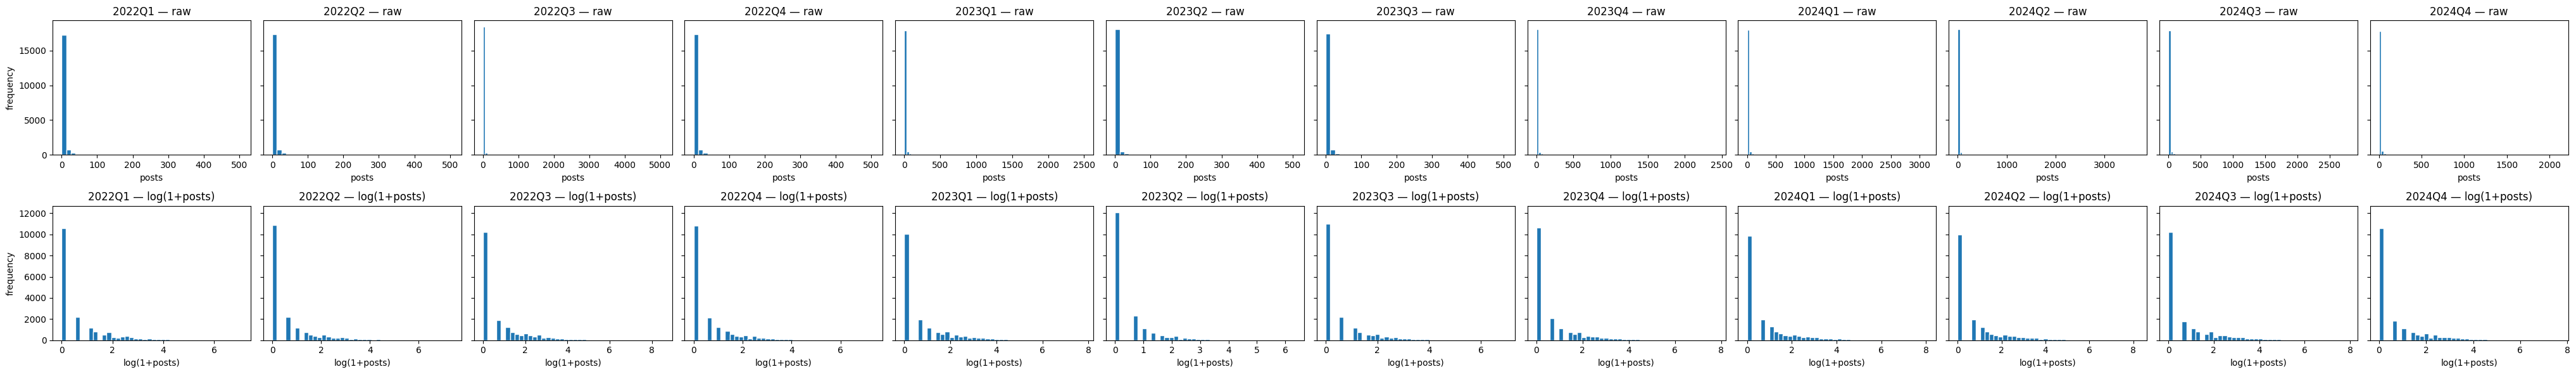

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_posts_transform_by_quarter(panel_df, count_col='num_postings', year_col='year', qtr_col='qtr',
                                    max_raw_bin_cap=500, bins_log=40, sort_quarters=True):
    # Build year-quarter label like "2022Q1"
    df = panel_df.copy()
    df['year_qtr'] = df[year_col].astype(int).astype(str) + 'Q' + df[qtr_col].astype(int).astype(str)

    # Order quarters chronologically if desired
    if sort_quarters:
        # Create a sortable key
        df['_yq_key'] = df[year_col].astype(int) * 10 + df[qtr_col].astype(int)
        qlist = df[['year_qtr','_yq_key']].drop_duplicates().sort_values('_yq_key')['year_qtr'].tolist()
    else:
        qlist = df['year_qtr'].drop_duplicates().tolist()

    # Summary stats per quarter
    rows = []
    for yq in qlist:
        x = pd.to_numeric(df.loc[df['year_qtr']==yq, count_col], errors='coerce').fillna(0).clip(lower=0)
        x_log = np.log1p(x)
        rows.append({
            'quarter': yq,
            'N cells': int(x.size),
            'zeros %': round(100*(x==0).mean(), 1),
            'raw_skew': float(x.skew()),
            'log1p_skew': float(x_log.skew()),
            'raw_p90': float(x.quantile(0.90)),
            'raw_p99': float(x.quantile(0.99)),
            'raw_max': float(x.max())
        })
    summ = pd.DataFrame(rows)
    print("\n=== Distribution diagnostics by quarter (occ×industry×quarter) ===")
    print(summ.to_string(index=False))

    # Plot histograms for each quarter: raw (top row), log1p (bottom row)
    nQ = len(qlist)
    fig, axes = plt.subplots(2, nQ, figsize=(3.4*nQ, 6), sharey='row')
    if nQ == 1:  # keep indexing simple when only one quarter
        axes = np.array([axes]).reshape(2,1)

    for j, yq in enumerate(qlist):
        x = pd.to_numeric(df.loc[df['year_qtr']==yq, count_col], errors='coerce').fillna(0).clip(lower=0)
        x_log = np.log1p(x)

        # Adaptive binning for raw
        xmax = x.max()
        if xmax <= 2000:
            step = max(1, int(np.ceil(min(xmax, max_raw_bin_cap)/40)))
            bins_raw = np.arange(0, min(xmax, max_raw_bin_cap) + step, step)
        else:
            bins_raw = 80

        axes[0, j].hist(x, bins=bins_raw, edgecolor='white')
        axes[0, j].set_title(f'{yq} — raw')
        axes[0, j].set_xlabel('posts')
        if j == 0:
            axes[0, j].set_ylabel('frequency')

        axes[1, j].hist(x_log, bins=bins_log, edgecolor='white')
        axes[1, j].set_title(f'{yq} — log(1+posts)')
        axes[1, j].set_xlabel('log(1+posts)')
        if j == 0:
            axes[1, j].set_ylabel('frequency')

    plt.tight_layout()
    plt.show()

plot_posts_transform_by_quarter(panel_df, count_col='num_postings',
                                year_col='year', qtr_col='qtr')


=== Distribution diagnostics (overall, occ×industry×quarter) ===
          metric           raw         log1p
         N cells 228000.000000 228000.000000
         zeros %     55.700000     55.700000
            mean      8.522982      0.833629
             std     52.713035      1.225315
             min      0.000000      0.000000
             p50      0.000000      0.000000
             p90     13.000000      2.639057
             p99    153.000000      5.036953
             max   5086.000000      8.534444
            skew     25.562322      1.685254
kurtosis(excess)   1191.413142      2.712491


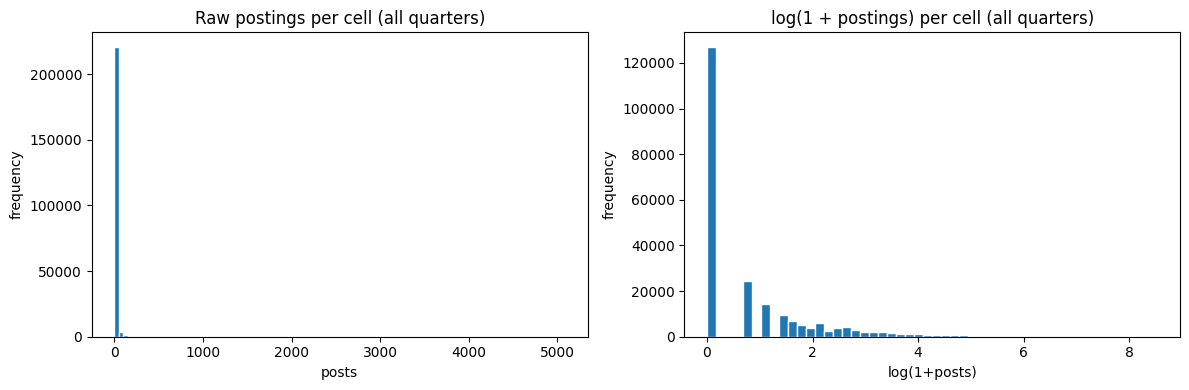

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_posts_transform_overall(panel_df, count_col='num_postings',
                                 max_raw_bin_cap=500, bins_log=50):
    """
    Make ONE pair of plots (raw vs log(1+x)) using all occ×industry×quarter cells.
    Also prints summary stats + skewness/kurtosis before/after the transform.
    """
    df = panel_df.copy()
    x = pd.to_numeric(df[count_col], errors='coerce').fillna(0).clip(lower=0)
    x_log = np.log1p(x)

    # ---- Summary table (overall) ----
    summary = pd.DataFrame({
        'metric': ['N cells','zeros %','mean','std','min','p50','p90','p99','max','skew','kurtosis(excess)'],
        'raw': [
            int(x.size),
            round(100*(x==0).mean(), 1),
            x.mean(), x.std(), x.min(),
            x.quantile(0.5), x.quantile(0.9), x.quantile(0.99), x.max(),
            x.skew(), x.kurt()
        ],
        'log1p': [
            int(x_log.size),
            round(100*(x==0).mean(), 1),  # zeros % w.r.t. raw
            x_log.mean(), x_log.std(), x_log.min(),
            x_log.quantile(0.5), x_log.quantile(0.9), x_log.quantile(0.99), x_log.max(),
            x_log.skew(), x_log.kurt()
        ]
    })
    print("\n=== Distribution diagnostics (overall, occ×industry×quarter) ===")
    print(summary.to_string(index=False))

    # ---- Histograms (overall) ----
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Adaptive bins for raw
    xmax = x.max()
    if xmax <= 2000:
        step = max(1, int(np.ceil(min(xmax, max_raw_bin_cap)/40)))
        bins_raw = np.arange(0, min(xmax, max_raw_bin_cap) + step, step)
    else:
        bins_raw = 100  # fallback for very large maxima

    axes[0].hist(x, bins=bins_raw, edgecolor='white')
    axes[0].set_title('Raw postings per cell (all quarters)')
    axes[0].set_xlabel('posts')
    axes[0].set_ylabel('frequency')

    axes[1].hist(x_log, bins=bins_log, edgecolor='white')
    axes[1].set_title('log(1 + postings) per cell (all quarters)')
    axes[1].set_xlabel('log(1+posts)')
    axes[1].set_ylabel('frequency')

    plt.tight_layout()
    plt.show()

    return summary

_ = plot_posts_transform_overall(panel_df, count_col='num_postings')

# High/Low AI Exposure

In [51]:
# Option 1: Create combined entity ID (occupation × industry)
panel['entity_id'] = panel['onet_code'].astype(str) + '_' + panel['rics_k50'].astype(str)

# Set 2-level MultiIndex: entity and time
panel_indexed = panel.set_index(['entity_id', 'month'])

# Basic PanelOLS with two-way fixed effects
from linearmodels import PanelOLS

model = PanelOLS(
    panel_indexed['log_postings'], 
    panel_indexed[['high_x_post']], 
    entity_effects=True,  # occupation × industry FE
    time_effects=True     # month FE
).fit(cov_type='clustered', cluster_entity=True)

print("\n=== DiD Regression Results ===")
print(model)


=== DiD Regression Results ===
                          PanelOLS Estimation Summary                           
Dep. Variable:           log_postings   R-squared:                        0.0001
Estimator:                   PanelOLS   R-squared (Between):              0.0072
No. Observations:              916800   R-squared (Within):               0.0024
Date:                Wed, Oct 29 2025   R-squared (Overall):              0.0062
Time:                        14:23:53   Log-likelihood                -4.815e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      103.10
Entities:                       19100   P-value                           0.0000
Avg Obs:                       48.000   Distribution:                F(1,897652)
Min Obs:                       48.000                                           
Max Obs:                       48.000   F-statistic (robust):             21.

In [126]:
scored_df_full['salary'].unique()

array([83294.90188593, 54557.325     , 63722.9556    , ...,
       75197.96336438, 27810.94267993, 58225.0193566 ])

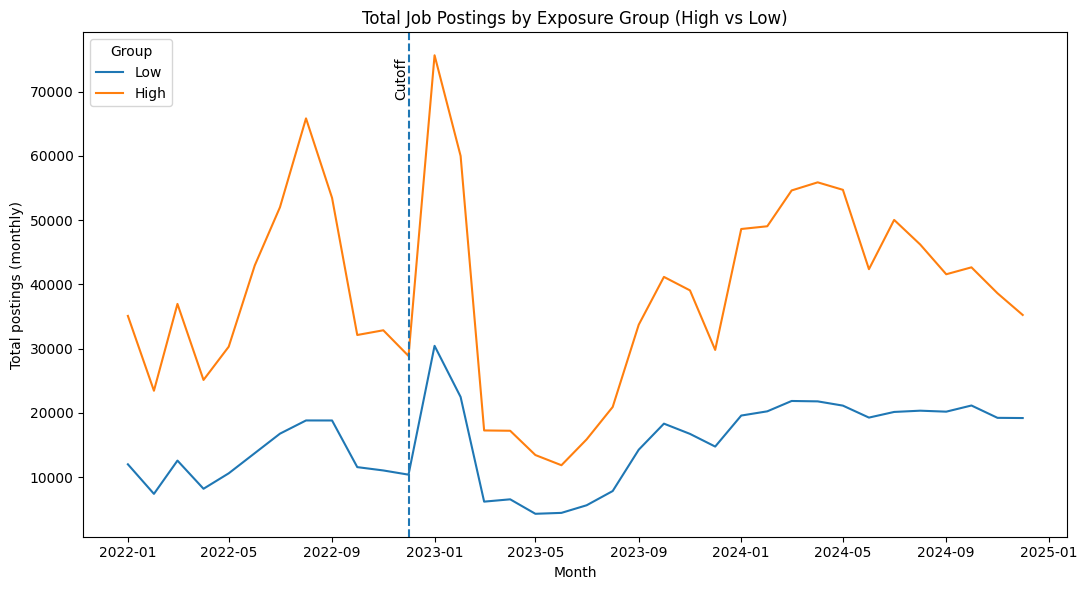

In [134]:
# --- 1) Aggregate postings by High/Low × month ---
panel = panel[(panel['month'] >= '2022-01-01') & (panel['month'] <= '2024-12-31')]
hl_month = (panel
            .groupby(['high_exposure','month'], as_index=False)['postings']
            .sum()
            .sort_values('month'))

# Map labels for legend
label_map = {0: 'Low', 1: 'High'}
hl_month['group'] = hl_month['high_exposure'].map(label_map)

# Pivot to wide: columns = ['Low','High'], index = month
hl_wide = (hl_month
           .pivot(index='month', columns='group', values='postings')
           .reindex(columns=['Low','High']))  # fixed order

# --- 2) Plot RAW totals ---
plt.figure(figsize=(11,6))
for col in hl_wide.columns:
    plt.plot(hl_wide.index, hl_wide[col], label=col)

# Vertical line at treatment cutoff if available
try:
    cutoff
    plt.axvline(cutoff, linestyle='--')
    ymax = plt.gca().get_ylim()[1]
    plt.text(cutoff, ymax*0.95, 'Cutoff', rotation=90, va='top', ha='right')
except NameError:
    pass

plt.title('Total Job Postings by Exposure Group (High vs Low)')
plt.xlabel('Month')
plt.ylabel('Total postings (monthly)')
plt.legend(title='Group', loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
import numpy as np
import pandas as pd
from linearmodels import PanelOLS

TRUE_TREAT = pd.Timestamp('2022-12-01')

# --- A) Prior-trends test: High vs Low on ORIGINAL outcome ---
pre = panel.loc[panel['month'] < TRUE_TREAT].copy()

# If high_exposure not present, (re)create from ai_exposure median
if 'high_exposure' not in pre.columns:
    med = pre['ai_exposure'].median()
    pre['high_exposure'] = (pre['ai_exposure'] >= med).astype(int)

# Build centered time index in months over the pre period
pre = pre.sort_values('month')
uniq_m = np.sort(pre['month'].unique())
m2i = {m:i for i, m in enumerate(uniq_m)}
pre['t'] = pre['month'].map(m2i).astype(float)
pre['t'] = pre['t'] - pre['t'].median()

# Interaction: differential pre-slope for High vs Low (Low is baseline)
pre['t_x_high'] = pre['t'] * pre['high_exposure']

# Panel set-up
pre_idx = pre.set_index(['entity_id','month'])
Xcols = ['t','t_x_high']

res_prior = PanelOLS(
    pre_idx['log_postings'],
    pre_idx[Xcols],
    entity_effects=True,   # absorb entity levels
    time_effects=False     # allow t to capture common trend
).fit(cov_type='clustered', cluster_entity=True)

print("\n=== Prior Trends Test (High vs Low, pre-period; original outcome) ===")
print(res_prior.summary)


=== Prior Trends Test (High vs Low, pre-period; original outcome) ===
                          PanelOLS Estimation Summary                           
Dep. Variable:           log_postings   R-squared:                        0.0690
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:              439300   R-squared (Within):               0.0690
Date:                Wed, Oct 29 2025   R-squared (Overall):              0.0154
Time:                        14:26:21   Log-likelihood                -2.162e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.557e+04
Entities:                       19100   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                F(2,420198)
Min Obs:                       23.000                                           
Max Obs:                       23.000 

In [49]:
high_onets = (panel.loc[panel['high_exposure'] == 1, 'onet_code']
                   .dropna()
                   .astype(str).str.strip()
                   .unique())

low_onets = (panel.loc[panel['high_exposure'] == 0, 'onet_code']
                   .dropna()
                   .astype(str).str.strip()
                   .unique())

In [50]:
titles_high = (exposure_df.loc[
                  exposure_df['O*NET-SOC Code'].astype(str).str.strip().isin(high_onets),
                  ['O*NET-SOC Code', 'Title']  # adjust 'Title' to your column name
               ]
               .drop_duplicates()
               .sort_values('Title'))

titles_low = (exposure_df.loc[
                  exposure_df['O*NET-SOC Code'].astype(str).str.strip().isin(low_onets),
                  ['O*NET-SOC Code', 'Title']  # adjust 'Title' to your column name
               ]
               .drop_duplicates()
               .sort_values('Title'))

pd.set_option('display.max_rows', None)

In [ ]:
titles_high

O*NET-SOC Code                                              Title
88      13-2011.00                           Accountants and Auditors
131     15-2011.00                                          Actuaries
9       11-3012.00                   Administrative Services Managers
575     41-3011.00                           Advertising Sales Agents
4       11-2011.00                Advertising and Promotions Managers
145     17-2011.00                                Aerospace Engineers
56      13-1011.00  Agents and Business Managers of Artists, Perfo...
282     25-1041.00      Agricultural Sciences Teachers, Postsecondary
196     19-1011.00                                  Animal Scientists
140     17-1011.00             Architects, Except Landscape and Naval
339     27-1011.00                                      Art Directors
593     43-3011.00                        Bill and Account Collectors
594     43-3021.00                         Billing and Posting Clerks
199     19-1021.00                      Biochemists and Biophysicists
147     17-2031.00              Bioengineers and Biomedical Engineers
128     15-1299.07                               Blockchain Engineers
595     43-3031.00       Bookkeeping, Accounting, and Auditing Clerks
363     27-3011.00        Broadcast Announcers and Radio Disc Jockeys
600     43-4011.00                                   Brokerage Clerks
84      13-1199.04                       Business Continuity Planners
137     15-2051.01                     Business Intelligence Analysts
1       11-1011.03                      Chief Sustainability Officers
183     17-3022.00    Civil Engineering Technologists and Technicians
60      13-1031.00     Claims Adjusters, Examiners, and Investigators
138     15-2051.02                             Clinical Data Managers
41      11-9121.01                     Clinical Research Coordinators
343     27-1021.00                Commercial and Industrial Designers
25      11-3111.00                 Compensation and Benefits Managers
80      13-1141.00  Compensation, Benefits, and Job Analysis Speci...
51      11-9199.02                                Compliance Managers
62      13-1041.00                                Compliance Officers
152     17-2061.00                        Computer Hardware Engineers
110     15-1241.00                        Computer Network Architects
108     15-1231.00               Computer Network Support Specialists
116     15-1251.00                               Computer Programmers
104     15-1211.00                          Computer Systems Analysts
129     15-1299.08              Computer Systems Engineers/Architects
109     15-1232.00                  Computer User Support Specialists
12      11-3021.00          Computer and Information Systems Managers
69      13-1051.00                                    Cost Estimators
572     41-2021.00                          Counter and Rental Clerks
92      13-2041.00                                    Credit Analysts
603     43-4041.00           Credit Authorizers, Checkers, and Clerks
604     43-4051.00                   Customer Service Representatives
632     43-9021.00                                  Data Entry Keyers
136     15-2051.00                                    Data Scientists
114     15-1243.01                       Data Warehousing Specialists
112     15-1242.00                            Database Administrators
113     15-1243.00                                Database Architects
634     43-9031.00                                 Desktop Publishers
127     15-1299.06                         Digital Forensics Analysts
269     21-2021.00      Directors, Religious Activities and Education
620     43-5032.00    Dispatchers, Except Police, Fire, and Ambulance
124     15-1299.03                    Document Management Specialists
224     19-3011.00                                         Economists
366     27-3041.00                                            Editors
32      11-903

In [ ]:
titles_low

O*NET-SOC Code                                              Title
350     27-2011.00                                             Actors
402     29-1141.01                                  Acute Care Nurses
642     45-2011.00                            Agricultural Inspectors
871     53-1041.00                Aircraft Cargo Handling Supervisors
726     49-3011.00         Aircraft Mechanics and Service Technicians
901     53-6032.00                        Aircraft Service Attendants
765     51-2011.00  Aircraft Structure, Surfaces, Rigging, and Sys...
879     53-2022.00                    Airfield Operations Specialists
876     53-2011.00     Airline Pilots, Copilots, and Flight Engineers
422     29-1229.01                       Allergists and Immunologists
540     39-2011.00                                    Animal Trainers
33      11-9041.00             Architectural and Engineering Managers
212     19-2011.00                                        Astronomers
355     27-2021.00                    Athletes and Sports Competitors
191     17-3027.01                 Automotive Engineering Technicians
774     51-3011.00                                             Bakers
523     35-3023.01                                           Baristas
521     35-3011.00                                         Bartenders
837     51-8099.01                    Biofuels Processing Technicians
19      11-3051.03                       Biofuels Production Managers
34      11-9041.01  Biofuels/Biodiesel Technology and Product Deve...
55      11-9199.11  Brownfield Redevelopment Specialists and Site ...
775     51-3021.00                          Butchers and Meat Cutters
57      13-1021.00        Buyers and Purchasing Agents, Farm Products
895     53-5021.00       Captains, Mates, and Pilots of Water Vessels
318     25-2032.00  Career/Technical Education Teachers, Secondary...
616     43-5011.00                           Cargo and Freight Agents
570     41-2011.00                                           Cashiers
513     35-1011.00                               Chefs and Head Cooks
148     17-2041.00                                 Chemical Engineers
838     51-9011.00           Chemical Equipment Operators and Tenders
243     19-4031.00                               Chemical Technicians
215     19-2031.00                                           Chemists
0       11-1011.00                                   Chief Executives
149     17-2051.00                                    Civil Engineers
356     27-2022.00                                 Coaches and Scouts
877     53-2012.00                                  Commercial Pilots
858     51-9161.00     Computer Numerically Controlled Tool Operators
715     49-2011.00  Computer, Automated Teller, and Office Machine...
29      11-9021.00                              Construction Managers
708     47-5041.00                Continuous Mining Machine Operators
741     49-9012.00  Control and Valve Installers and Repairers, Ex...
517     35-2013.00                           Cooks, Private Household
518     35-2014.00                                  Cooks, Restaurant
519     35-2015.00                                 Cooks, Short Order
340     27-1012.00                                      Craft Artists
583     41-9011.00                Demonstrators and Product Promoters
496     33-3021.00              Detectives and Criminal Investigators
527     35-9021.00                                        Dishwashers
589     41-9091.00  Door-to-Door Sales Workers, News and Street Ve...
31      11-9032.00  Education Administrators, Kindergarten through...
257     21-1012.00  Educational, Guidance, and Career Counselors a...
767     51-2022.00     Electrical and Electronic Equipment Assemblers
721     49-2094.00  Electrical and Electronics Repairers, Commerci...
722     49-2095.00  Electrical and Electronics Repairers, Powerhou...
671     47-2111.00                                       Electricians
185     17-302

In [23]:
scored_df_2022_onwards = scored_df_full[
    (scored_df_full['post_date'] >= '2022-01-01') &
    (scored_df_full['post_date'] <= '2024-12-31')
]

# High vs. Low AI Exposure Occupations by rics_k50 Industry

In [146]:
scored_df_2022_onwards['rics_k50'].unique()

array(['Human Resources Services', 'Financial Services',
       'Engineering and Construction Services',
       'Electronics Manufacturing', 'Energy and Resources',
       'Marketing and Advertising Services',
       'Information Technology Services', 'Pharmaceuticals',
       'Media and Entertainment', 'Hospitality and Tourism Management',
       'Wellness Products', 'Automation Solutions',
       'Healthcare and Wellness Services', 'IT Consulting Services',
       'Professional Development Services',
       'Logistics and Transportation', 'Digital Commerce Services',
       'Facility Management Services', 'Humanitarian Services',
       'Consulting and Advisory Services', 'Business Services',
       'Education Services', 'Food and Hospitality Services',
       'Real Estate and Development', 'Agricultural Services',
       'Industrial Manufacturing', 'Sports Management', 'Miscellaneous',
       'Culture and Entertainment', 'Aerospace and Defense',
       'Apparel Retail', 'Commercial 

In [46]:
# --- helpers from your snippet ---
def _norm_onet(code: str) -> str:
    s = str(code).strip()
    m = re.match(r'^(\d{2}-\d{4})', s)
    if m: return m.group(1)
    s = s.split('.')[0]
    m2 = re.match(r'^(\d{2})(\d{4})$', s)
    return f"{m2.group(1)}-{m2.group(2)}" if m2 else s

def _fit_log_trend(y: pd.Series):
    if len(y) < 3 or not np.any(y.values > 0):
        return None, np.nan, np.nan
    t = np.arange(len(y), dtype=float)
    a1, a0 = np.polyfit(t, np.log1p(y.values.astype(float)), 1)
    g_month = np.exp(a1) - 1
    g_year  = (1 + g_month)**12 - 1
    yhat = pd.Series(np.expm1(a0 + a1*t), index=y.index)
    return yhat, g_month*100, g_year*100

def _extract_codes_titles(x):
    """Accepts list/array or DataFrame with 'O*NET-SOC Code' and optional 'Title'."""
    if isinstance(x, pd.DataFrame):
        codes = x['O*NET-SOC Code'].astype(str).map(_norm_onet).unique().tolist()
        title_map = dict(zip(
            x['O*NET-SOC Code'].astype(str).map(_norm_onet),
            x.get('Title', pd.Series([None]*len(x))).astype(str)
        ))
    else:
        codes = pd.Series(x, dtype=str).map(_norm_onet).unique().tolist()
        title_map = {c: None for c in codes}
    return set(codes), title_map

# --- main ---
def plot_industries_high_low(scored_df_2022_onwards: pd.DataFrame,
                             rics_k50_list,
                             titles_high,
                             titles_low,
                             treatment_date='2022-12-01',
                             count_unique_jobid: bool = True,
                             buffer_months: int = 1,
                             title_prefix: str = None):
    """
    rics_k50_list: str or list-like of industry names to include (pooled).
    titles_high / titles_low: list of ONET codes or DataFrame with 'O*NET-SOC Code' and optional 'Title'.
    """
    df = scored_df_2022_onwards.copy()

    # month index
    if 'month' in df.columns:
        df['month'] = pd.to_datetime(df['month']).dt.to_period('M').dt.to_timestamp()
    else:
        df['month'] = pd.to_datetime(df['post_date']).dt.to_period('M').dt.to_timestamp()

    # normalize ONETs
    df['onet_norm'] = df['onet_code'].astype(str).map(_norm_onet)

    # normalize industry input
    if isinstance(rics_k50_list, str):
        sel_inds = [rics_k50_list]
    else:
        sel_inds = [str(x) for x in rics_k50_list]

    # filter to industries
    dfi = df[df['rics_k50'].astype(str).isin(sel_inds)].copy()
    if dfi.empty:
        raise ValueError(f"No rows found for rics_k50 in {sel_inds}.")

    # high/low ONET sets + title maps
    high_set, high_title_map = _extract_codes_titles(titles_high)
    low_set,  low_title_map  = _extract_codes_titles(titles_low)

    # exposure group label
    dfi['exposure_group'] = np.where(dfi['onet_norm'].isin(high_set), 'High',
                              np.where(dfi['onet_norm'].isin(low_set),  'Low', np.nan))
    dfi = dfi.dropna(subset=['exposure_group'])

    # aggregate monthly counts (pooled across selected industries)
    agg_fun = (lambda s: s.nunique()) if count_unique_jobid else (lambda s: s.size)
    ts = (dfi.groupby(['month','exposure_group'])['job_id'].apply(agg_fun)
              .rename('postings')
              .reset_index())

    # monthly series per group (fill 0s)
    full_idx = pd.date_range(ts['month'].min(), ts['month'].max(), freq='MS')
    series = {}
    for g in ['High','Low']:
        gi = ts[ts['exposure_group']==g].set_index('month')['postings'].reindex(full_idx, fill_value=0)
        gi.index.name = 'month'
        series[g] = gi

    # pre/post cut
    t0 = pd.to_datetime(treatment_date)
    pre_end    = t0 - pd.offsets.MonthBegin(1)
    post_start = t0 + pd.offsets.MonthBegin(buffer_months)

    # --- plotting (pooled) ---
    fig, ax = plt.subplots(figsize=(10,5))
    for g in ['High','Low']:
        ax.plot(series[g].index, series[g].values, label=f'{g} exposure — monthly postings')

    for g in ['High','Low']:
        s = series[g]
        pre  = s[(s.index <= pre_end)]
        post = s[(s.index >= post_start)]
        pre_fit, pre_gm, _   = _fit_log_trend(pre)
        post_fit, post_gm, _ = _fit_log_trend(post)
        if pre_fit is not None:
            ax.plot(pre_fit.index, pre_fit.values, linestyle=':', linewidth=1.6,
                    label=f'{g} PRE log-trend (~{pre_gm:.1f}%/mo)')
        if post_fit is not None:
            ax.plot(post_fit.index, post_fit.values, linestyle='--', linewidth=1.6,
                    label=f'{g} POST log-trend (~{post_gm:.1f}%/mo)')

    ax.axvline(t0, color='red', linestyle='-', linewidth=1.2, label=f'Treatment: {t0.date()}')
    title = title_prefix or f"{', '.join(sel_inds)} — High vs Low AI exposure (pooled)"
    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_xlabel("Month")
    ax.set_ylabel("Postings (log scale, unique job_id)" if count_unique_jobid else "Postings (log scale, row count)")
    ax.grid(True, alpha=0.25)
    ax.legend(loc='best', ncol=2)
    plt.tight_layout()

    # --- within-industry exposure summaries (printed per industry and pooled) ---
    def _summarize_within_industry(sub_df, label):
        # compute stats separately for High/Low within this sub_df
        out = {}
        for g, aset, amap in [('High', high_set, high_title_map), ('Low', low_set, low_title_map)]:
            gi = sub_df[sub_df['onet_norm'].isin(aset)].copy()
            # posting-weighted mean exposure in this industry subset
            mean_posting_weighted = float(gi['ai_exposure'].mean()) if 'ai_exposure' in gi.columns and len(gi) else np.nan
            # ONET-average mean within this industry subset
            if 'ai_exposure' in gi.columns and len(gi):
                onet_means = (gi.groupby('onet_norm')['ai_exposure'].mean().reset_index(name='ai_mean'))
                mean_onet_average = float(onet_means['ai_mean'].mean()) if len(onet_means) else np.nan
            else:
                mean_onet_average = np.nan
            # present ONETs/titles actually used in this subset
            present_codes = sorted(gi['onet_norm'].unique().tolist())
            present_titles = []
            for c in present_codes:
                t = amap.get(c)
                if t and t != 'None':
                    present_titles.append((c, t))
            present_titles = sorted(set(present_titles))
            out[g] = {
                'mean_ai_exposure_posting_weighted': mean_posting_weighted,
                'mean_ai_exposure_onet_average': mean_onet_average,
                'onet_codes': present_codes,
                'onet_titles': present_titles,
            }

        # print
        print(f"\n=== {label}: within-industry exposure summary ===")
        for g in ['High','Low']:
            info = out[g]
            print(f"{g} exposure:")
            print(f"  Mean AI exposure (posting-weighted): {info['mean_ai_exposure_posting_weighted']:.4f}")
            print(f"  Mean AI exposure (ONET-average):     {info['mean_ai_exposure_onet_average']:.4f}")
            codes = ', '.join(info['onet_codes']) if info['onet_codes'] else '(none)'
            print(f"  ONET codes in selection: {codes}")
            if info['onet_titles']:
                titles_str = ', '.join([f"{c} {t}" for c, t in info['onet_titles'][:]])
                print(f"  Titles ({len(info['onet_titles'])}): {titles_str}")
            else:
                print("  Titles: (not available from inputs)")
        return out

    # per-industry
    per_industry_info = {}
    for ind in sel_inds:
        sub_ind = dfi[dfi['rics_k50'].astype(str) == str(ind)]
        if not sub_ind.empty:
            per_industry_info[ind] = _summarize_within_industry(sub_ind, ind)

    # pooled across selected industries
    pooled_info = _summarize_within_industry(dfi, "POOLED selection")

    return fig, series, per_industry_info, pooled_info


=== Financial Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5621
  Mean AI exposure (ONET-average):     0.5631
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1011, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2041, 19-2042, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 23-1011, 23-1012, 23-

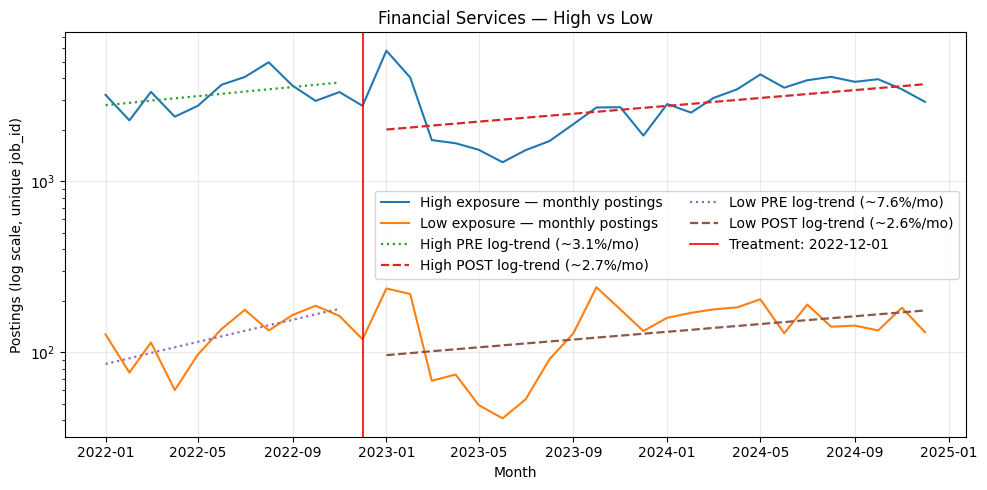

In [203]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Financial Services"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Financial Services — High vs Low"
)


=== Consulting and Advisory Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5522
  Mean AI exposure (ONET-average):     0.5617
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 21-2021, 23-1011, 23-1012

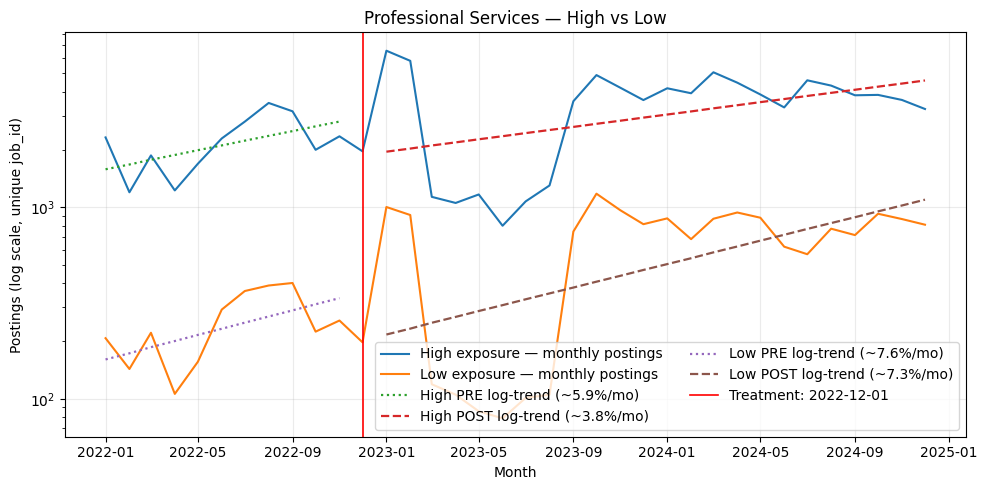

In [51]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Consulting and Advisory Services", "Business Services", "Legal Services", "Professional and Trade Associations", "Public Sector Management"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Professional Services — High vs Low"
)


=== Information Technology Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5819
  Mean AI exposure (ONET-average):     0.5613
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1011, 13-1031, 13-1032, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-2042, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061,

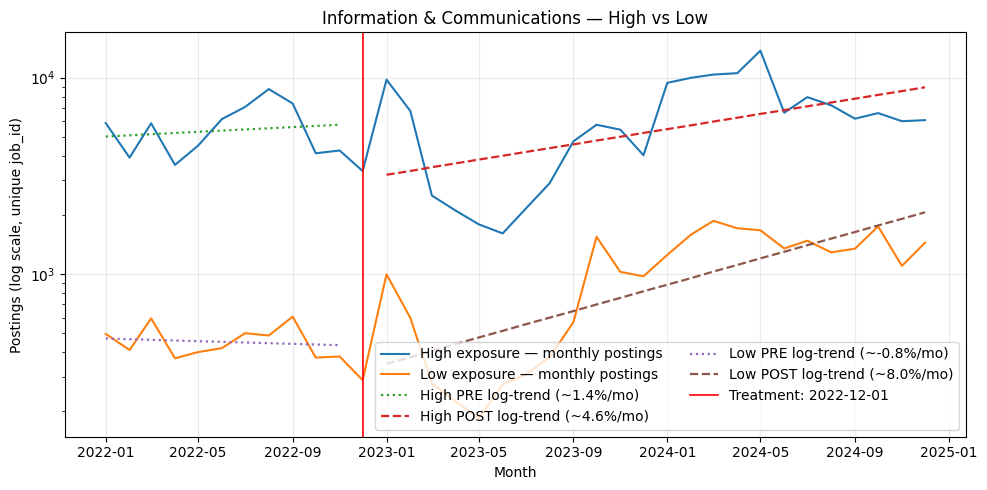

In [208]:
tech_core = [
    "Information Technology Services",
    "IT Consulting Services",
    "Telecommunications Services",
    "Digital Commerce Services",
    "Automation Solutions",
    "Consumer Technology Distribution"
]

sg_ic_core = [
    "Information Technology Services",
    "IT Consulting Services",
    "Telecommunications Services",
]

fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=sg_ic_core,
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Information & Communications — High vs Low"
)


=== Marketing and Advertising Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5506
  Mean AI exposure (ONET-average):     0.5619
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2051, 17-1011, 17-1022, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3031, 19-1011, 19-1021, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 21-2021, 23-1011, 23-1012, 23-2011, 23-2093, 25-1123, 25-9031, 27-10

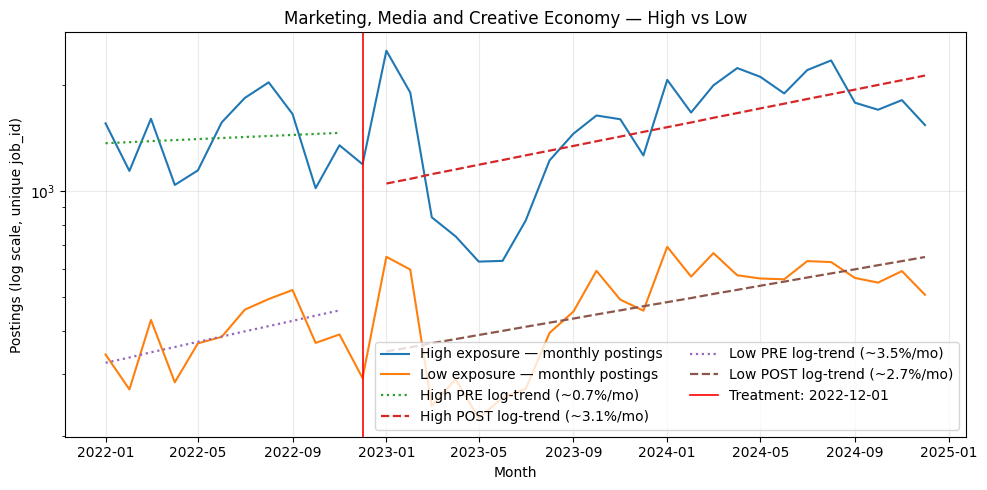

In [188]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Marketing and Advertising Services", "Media and Entertainment", "Culture and Entertainment", "Design and Printing Services"],    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Marketing, Media and Creative Economy — High vs Low"
)


=== Logistics and Transportation: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5380
  Mean AI exposure (ONET-average):     0.5598
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1011, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2041, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 21-2021, 23-1011, 23-1012, 23

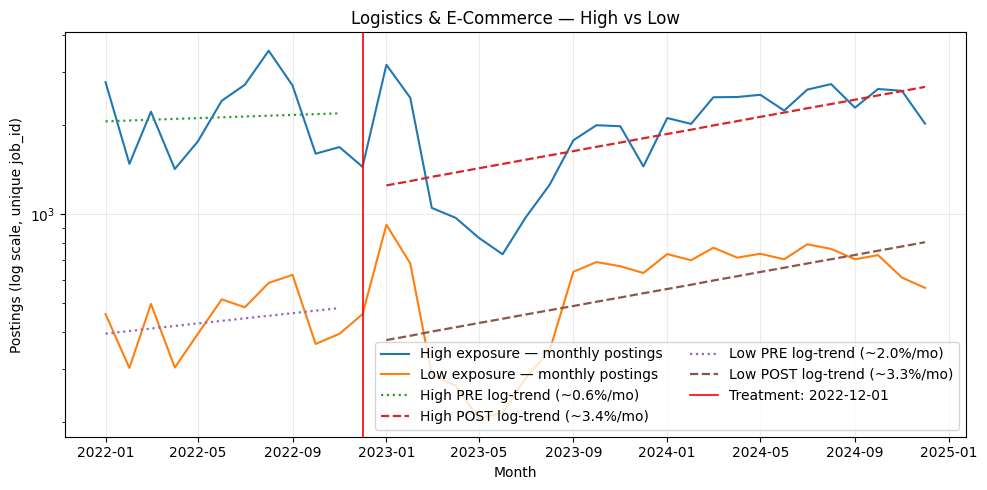

In [189]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Logistics and Transportation", "Digital Commerce Services", "Consumer Technology Distribution","Packaging Services"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Logistics & E-Commerce — High vs Low"
)


=== Electronics Manufacturing: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5557
  Mean AI exposure (ONET-average):     0.5625
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 21-2021, 23-1011, 23-1012, 23-20

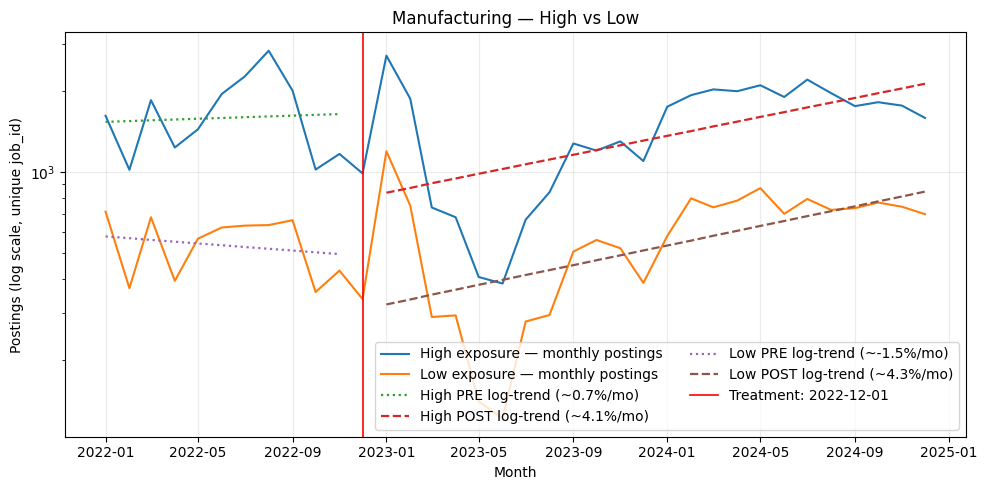

In [ ]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Electronics Manufacturing", "Industrial Manufacturing", "Materials Manufacturing"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Manufacturing — High vs Low"
)


=== Engineering and Construction Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5380
  Mean AI exposure (ONET-average):     0.5618
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1031, 13-1032, 13-1041, 13-1051, 13-1071, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2151, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-2042, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19

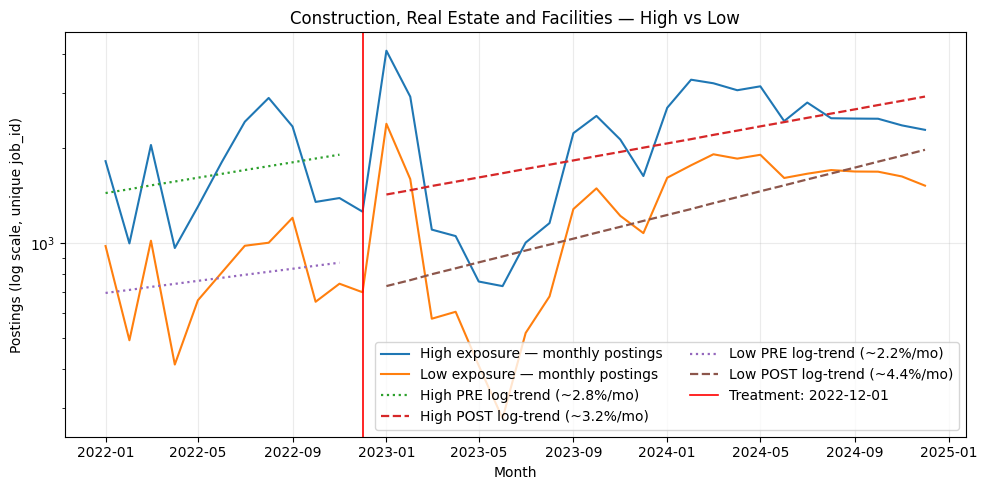

In [191]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Engineering and Construction Services", "Real Estate and Development", "Facility Management Services", "Architectural Design Services"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Construction, Real Estate and Facilities — High vs Low"
)


=== Engineering and Construction Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5380
  Mean AI exposure (ONET-average):     0.5618
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1031, 13-1032, 13-1041, 13-1051, 13-1071, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2151, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-2042, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19

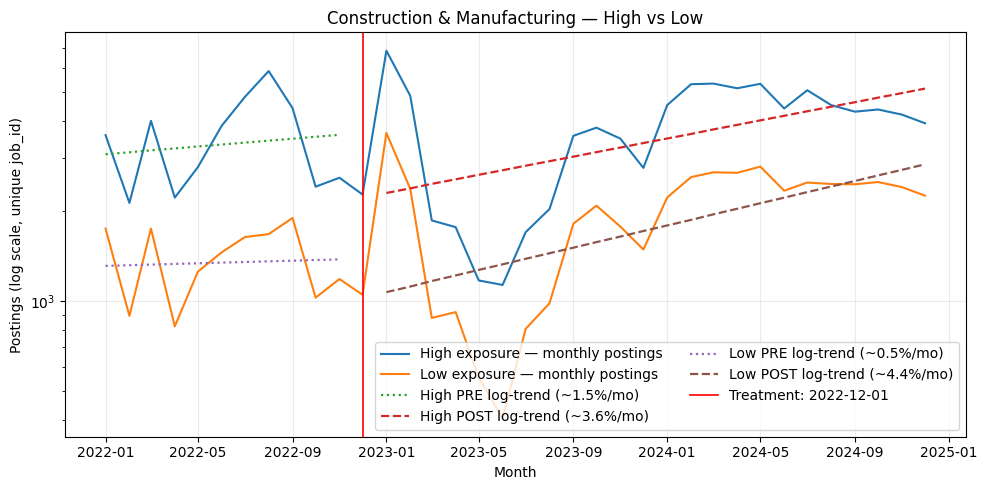

In [200]:
construction_and_manufacturing = ["Engineering and Construction Services", "Real Estate and Development", "Facility Management Services", "Architectural Design Services"] + ["Electronics Manufacturing", "Industrial Manufacturing", "Materials Manufacturing", "Quality Assurance and Testing Services"]

fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=construction_and_manufacturing,
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Construction & Manufacturing — High vs Low"
)


=== Energy and Resources: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5407
  Mean AI exposure (ONET-average):     0.5582
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9131, 11-9141, 11-9199, 13-1031, 13-1032, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2051, 17-1011, 17-1022, 17-2011, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-2042, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 21-2021, 2

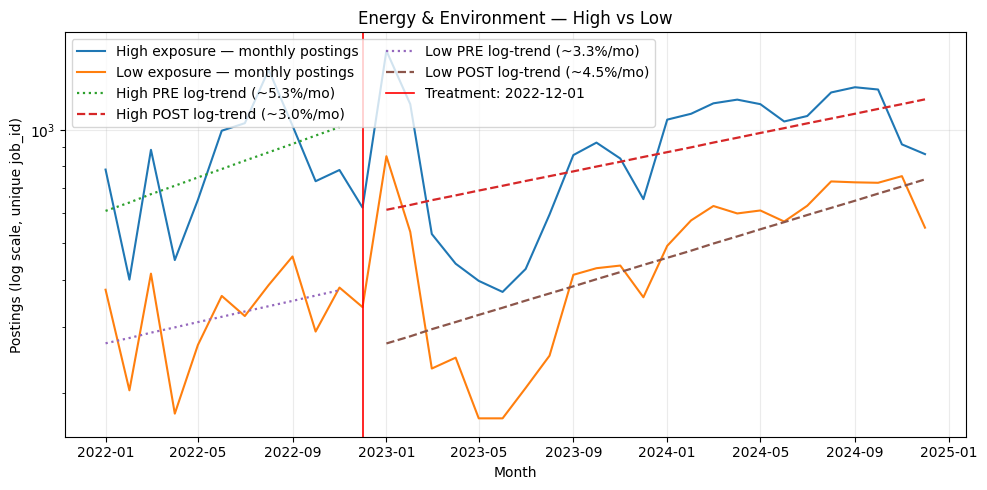

In [192]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Energy and Resources", "Environmental Services"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Energy & Environment — High vs Low"
)


=== Biotech and Healthcare Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5464
  Mean AI exposure (ONET-average):     0.5605
  ONET codes in selection: 11-1011, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9199, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 23-1011, 23-1012, 23-2011, 25-9031, 27-1011, 27-1021, 27-1024, 27-2012, 27-3031, 27-3042, 27-3043, 27-4032, 41-1011, 41-1012, 41-2021,

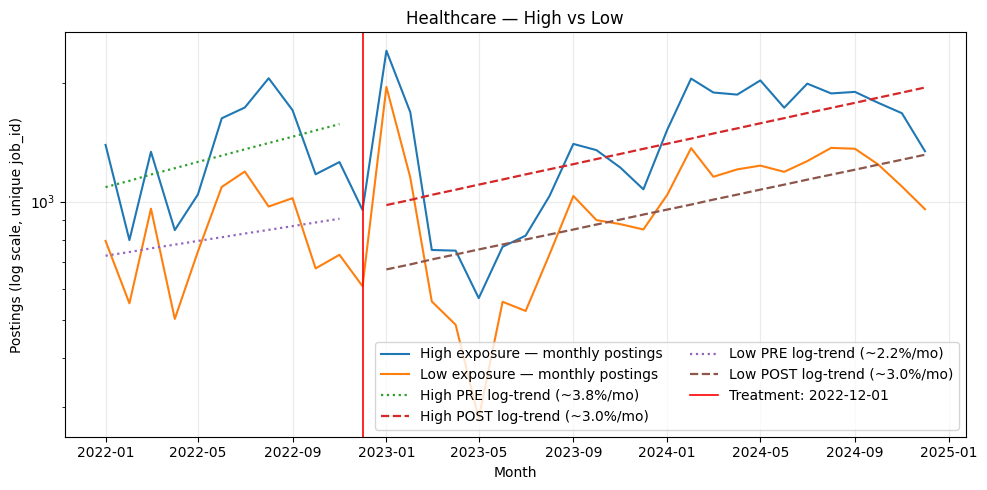

In [193]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Biotech and Healthcare Services", "Healthcare and Wellness Services", "Pharmaceuticals"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Healthcare — High vs Low"
)


=== Hospitality and Tourism Management: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5213
  Mean AI exposure (ONET-average):     0.5599
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9141, 11-9199, 13-1011, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2051, 17-1011, 17-1022, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2032, 19-2041, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 21-2021, 23-1011, 23-1012, 23-20

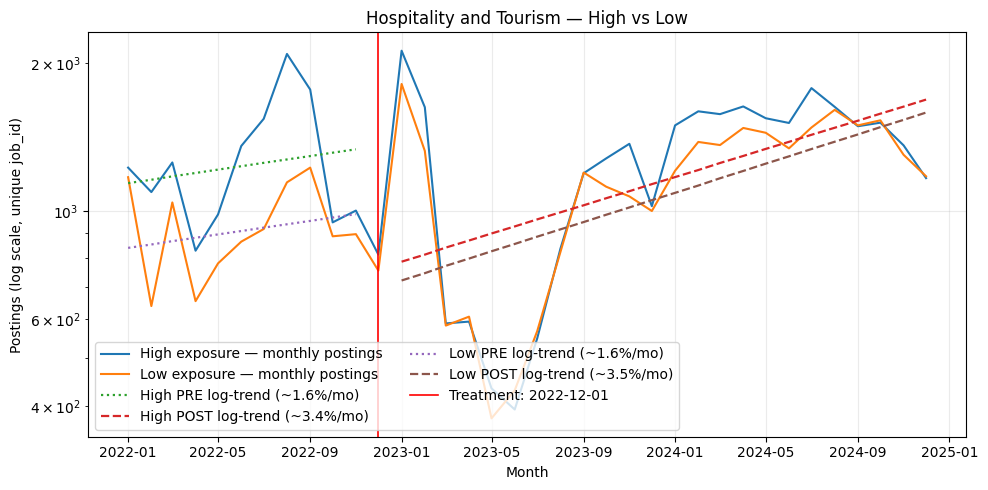

In [194]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Hospitality and Tourism Management", "Food and Hospitality Services", "Food and Beverage", "Commercial Aviation"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Hospitality and Tourism — High vs Low"
)


=== Education Services: within-industry exposure summary ===
High exposure:
  Mean AI exposure (posting-weighted): 0.5532
  Mean AI exposure (ONET-average):     0.5651
  ONET codes in selection: 11-1011, 11-1031, 11-2011, 11-2021, 11-2022, 11-2032, 11-2033, 11-3012, 11-3013, 11-3021, 11-3031, 11-3051, 11-3061, 11-3071, 11-3111, 11-3121, 11-3131, 11-9033, 11-9121, 11-9199, 13-1031, 13-1041, 13-1051, 13-1071, 13-1075, 13-1081, 13-1082, 13-1111, 13-1131, 13-1141, 13-1151, 13-1161, 13-1199, 13-2011, 13-2041, 13-2051, 13-2052, 13-2053, 13-2054, 13-2072, 13-2082, 13-2099, 15-1211, 15-1212, 15-1231, 15-1232, 15-1241, 15-1242, 15-1243, 15-1244, 15-1251, 15-1252, 15-1253, 15-1254, 15-1255, 15-1299, 15-2011, 15-2041, 15-2051, 17-1011, 17-1022, 17-2031, 17-2061, 17-2071, 17-2072, 17-2111, 17-2112, 17-2171, 17-2199, 17-3012, 17-3013, 17-3022, 17-3031, 19-1011, 19-1021, 19-2041, 19-2042, 19-3011, 19-3032, 19-3041, 19-3051, 19-3093, 19-4061, 19-4099, 23-1011, 23-1012, 23-2011, 23-2093, 25-1032, 25-

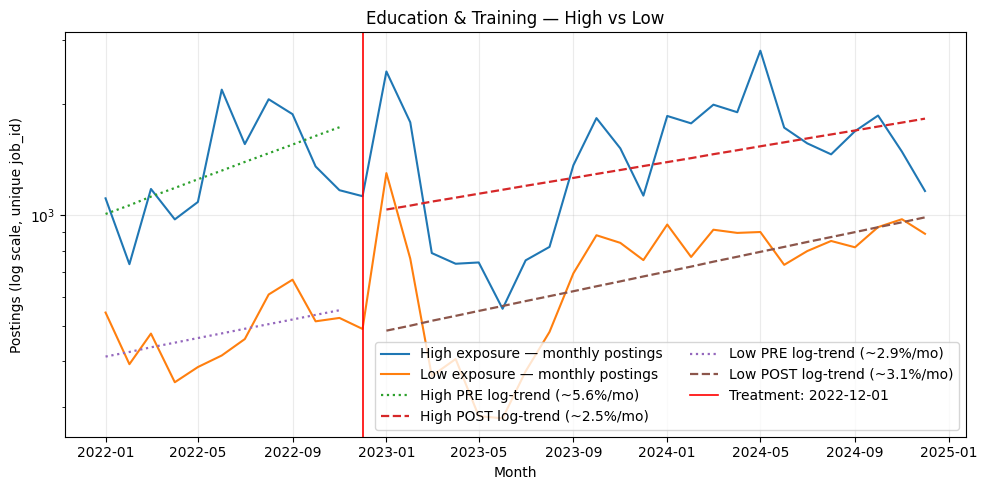

In [195]:
fig, series, per_industry, pooled = plot_industries_high_low(
    scored_df_2022_onwards,
    rics_k50_list=["Education Services", "Professional Development Services"],
    titles_high=titles_high,    # your high list or DataFrame
    titles_low=titles_low,      # your low list or DataFrame
    treatment_date='2022-12-01',
    buffer_months=1,
    title_prefix="Education & Training — High vs Low"
)

In [196]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _norm_onet(code: str) -> str:
    s = str(code).strip()
    m = re.match(r'^(\d{2}-\d{4})', s)
    if m: return m.group(1)
    s = s.split('.')[0]
    m2 = re.match(r'^(\d{2})(\d{4})$', s)
    return f"{m2.group(1)}-{m2.group(2)}" if m2 else s

def plot_onet_series_prepost(scored_df_full: pd.DataFrame,
                             onet_codes,
                             treatment_date='2022-12-01',
                             count_unique_jobid: bool = True,
                             show_log_growth_trend: bool = True,
                             title: str = None,
                             ax=None):
    """
    Aggregates postings for given ONET codes by month and plots:
      - monthly series
      - vertical treatment line at `treatment_date`
      - separate PRE and POST linear trends (levels), optional PRE/POST log-growth trends
    Returns: (ts, summary_df) where ts is the monthly series, summary_df has pre/post means & slopes.
    """
    df = scored_df_full.copy()

    # Month index
    if 'month' in df.columns:
        df['month'] = pd.to_datetime(df['month']).dt.to_period('M').dt.to_timestamp()
    else:
        df['month'] = pd.to_datetime(df['post_date']).dt.to_period('M').dt.to_timestamp()

    # Normalise ONETs
    df['onet_norm'] = df['onet_code'].astype(str).map(_norm_onet)
    onets = [_norm_onet(c) for c in onet_codes]

    sub = df[df['onet_norm'].isin(onets)].copy()
    if sub.empty:
        raise ValueError("No rows found for the provided ONET codes after normalisation.")

    # Aggregate monthly totals
    if count_unique_jobid:
        ts = sub.groupby('month')['job_id'].nunique().rename('postings')
    else:
        ts = sub.groupby('month').size().rename('postings')

    # Fill missing months
    full_idx = pd.date_range(ts.index.min(), ts.index.max(), freq='MS')
    ts = ts.reindex(full_idx, fill_value=0)
    ts.index.name = 'month'

    # Split PRE/POST
    t_date = pd.to_datetime(treatment_date)
    pre = ts[ts.index < t_date]
    post = ts[ts.index >= t_date]

    # Fit helper (levels trend and optional log-growth)
    def fit_trends(series):
        out = {}
        n = len(series)
        if n >= 3 and series.sum() >= 0:
            t = np.arange(n, dtype=float)
            y = series.values.astype(float)

            # Linear slope in levels
            b1, b0 = np.polyfit(t, y, 1)
            out['lin_slope_per_mo'] = b1
            out['lin_intercept'] = b0
            out['lin_yhat'] = pd.Series(b0 + b1*t, index=series.index)

            # Log-growth slope (≈ constant % growth)
            if show_log_growth_trend and np.any(y > 0):
                ly = np.log1p(y)
                a1, a0 = np.polyfit(t, ly, 1)
                g_m = np.exp(a1) - 1
                g_y = (1 + g_m)**12 - 1
                out['log_growth_mo'] = g_m
                out['log_growth_yr'] = g_y
                out['log_yhat'] = pd.Series(np.expm1(a0 + a1*t), index=series.index)
        return out

    pre_fit = fit_trends(pre) if len(pre) else {}
    post_fit = fit_trends(post) if len(post) else {}

    # Build summary
    summary = []
    def add_row(label, s, fit):
        if len(s):
            summary.append({
                'segment': label,
                'start': s.index.min().date(),
                'end': s.index.max().date(),
                'mean_postings': float(s.mean()),
                'lin_slope_per_mo': fit.get('lin_slope_per_mo', np.nan),
                'log_growth_%_mo': fit.get('log_growth_mo', np.nan) * 100 if 'log_growth_mo' in fit else np.nan,
                'log_growth_%_yr': fit.get('log_growth_yr', np.nan) * 100 if 'log_growth_yr' in fit else np.nan,
            })
    add_row('PRE', pre, pre_fit)
    add_row('POST', post, post_fit)
    summary_df = pd.DataFrame(summary)

    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(9,5))
    else:
        fig = ax.figure

    ax.plot(ts.index, ts.values, label='Monthly postings', linewidth=1.4)

    # Draw pre/post linear trends
    if 'lin_yhat' in pre_fit:
        ax.plot(pre_fit['lin_yhat'].index, pre_fit['lin_yhat'].values, label=f'PRE linear (Δ={pre_fit["lin_slope_per_mo"]:.2f}/mo)', alpha=0.9)
    if 'lin_yhat' in post_fit:
        ax.plot(post_fit['lin_yhat'].index, post_fit['lin_yhat'].values, label=f'POST linear (Δ={post_fit["lin_slope_per_mo"]:.2f}/mo)', alpha=0.9)

    # Optional pre/post log-growth trends
    if 'log_yhat' in pre_fit:
        ax.plot(pre_fit['log_yhat'].index, pre_fit['log_yhat'].values, linestyle=':', label=f'PRE log-growth (~{pre_fit["log_growth_mo"]*100:.1f}%/mo)', alpha=0.9)
    if 'log_yhat' in post_fit:
        ax.plot(post_fit['log_yhat'].index, post_fit['log_yhat'].values, linestyle=':', label=f'POST log-growth (~{post_fit["log_growth_mo"]*100:.1f}%/mo)', alpha=0.9)

    # Treatment line
    ax.axvline(t_date, color='red', linestyle='-', linewidth=1.2, label=f'Treatment: {t_date.date()}')

    # Labels
    if title is None:
        title = f"Postings for ONETs: {', '.join(onets)}"
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Postings (unique job_id)' if count_unique_jobid else 'Postings (row count)')
    ax.grid(True, alpha=0.25)
    ax.legend(loc='best')
    plt.tight_layout()

    return ts, summary_df

## Trends for High AI Exposure Scores

Mean AI Exposure Score: 0.6647076911807157


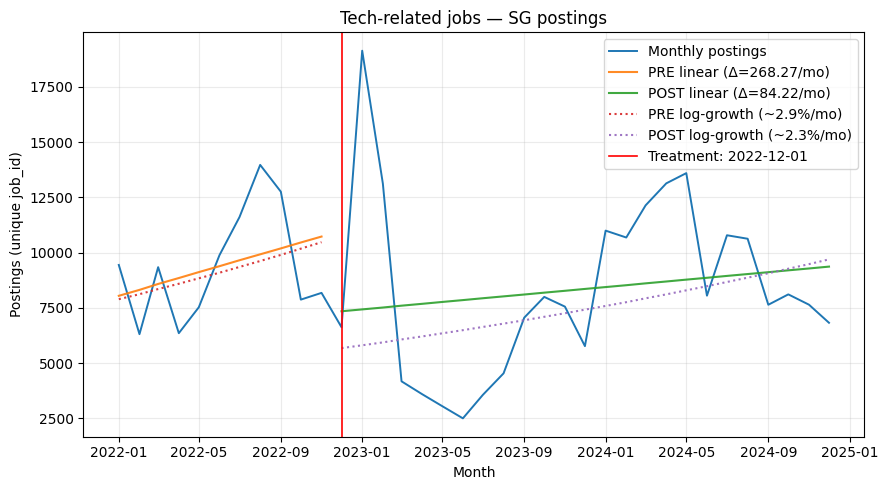

In [113]:
tech_high_onets = ['15-2011.00', '15-1299.07', '15-2051.01', '15-2051.02', '15-2051.00', '15-1243.01', '15-1242.00', '15-1243.00', '15-1299.06', '15-1299.03', '15-1212.00', '15-1299.05', '15-1299.09', '15-1241.01', '15-1244.00', '15-1232.00', '15-1231.00', '15-1241.00', '15-1251.00', '15-1211.00', '15-1299.08', '15-1252.00', '15-1253.00', '15-2041.00', '15-1255.01', '15-1254.00']

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(tech_high_onets)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=tech_high_onets,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='Tech-related jobs — SG postings'
)

Mean AI Exposure Score: 0.6095997172475264


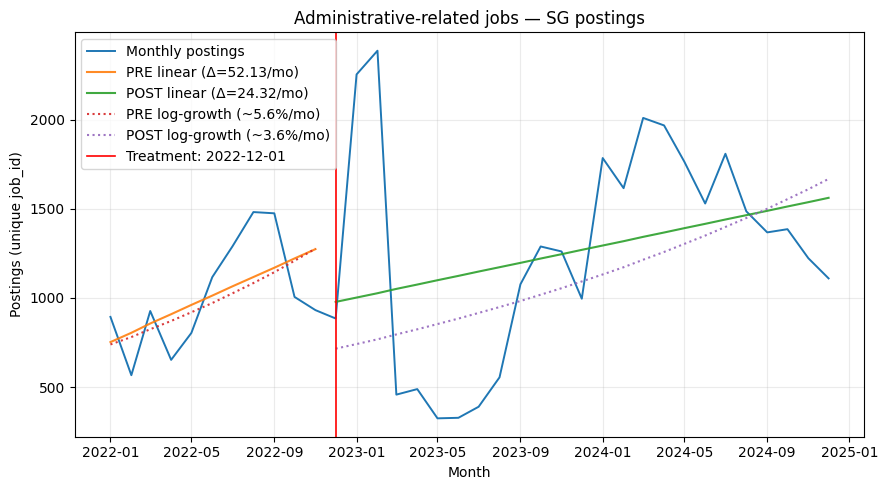

In [ ]:
admin_clerical_high = [
    '43-6011.00','43-6014.00','43-4171.00','43-9021.00','43-9022.00',
    '43-1011.00','43-9041.00','43-2011.00','43-4111.00','43-4141.00','43-5032.00'
]

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(admin_clerical_high)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=admin_clerical_high,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='Administrative-related jobs — SG postings'
)

Mean AI Exposure Score: 0.5513779734310369


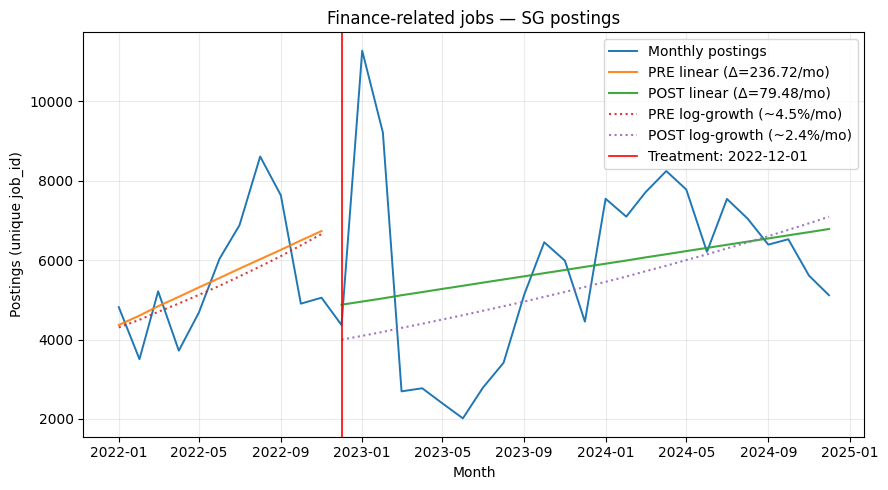

In [114]:
fin_acc_high = [
    '13-2011.00','11-3031.00','11-3031.01','13-2051.00','13-2052.00','13-2053.00','13-2054.00',
    '13-2041.00','13-2072.00','13-2099.01','13-2099.04','41-3031.00',
    '43-3031.00','43-3021.00','43-3051.00','43-4041.00','43-3071.00'
]

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(fin_acc_high)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=fin_acc_high,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='Finance-related jobs — SG postings'
)

Mean AI Exposure Score: 0.5140686837161514


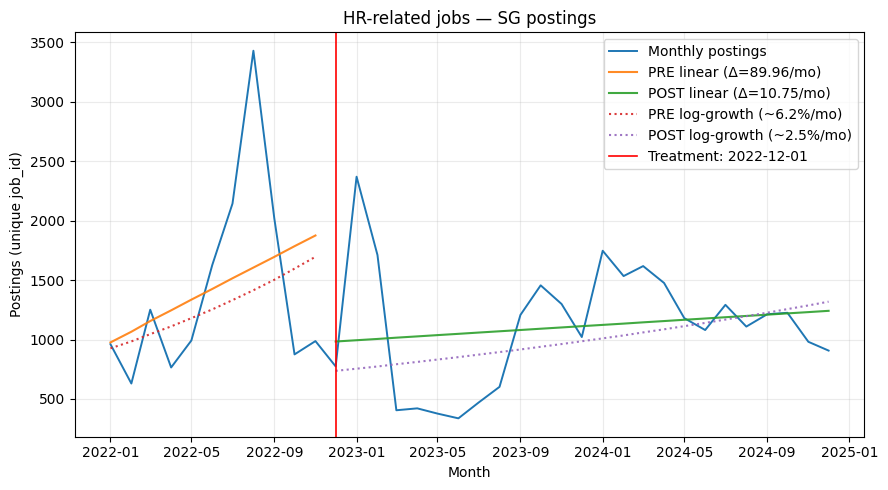

In [116]:
hr_people_high = [
    '11-3121.00','13-1071.00','13-1141.00','11-3111.00',
    '13-1151.00','11-3131.00','13-1075.00'
]

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(hr_people_high)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=hr_people_high,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='HR-related jobs — SG postings'
)

## Trends for Low AI Exposure Scores

Mean AI Exposure Score: 0.28987803769242937


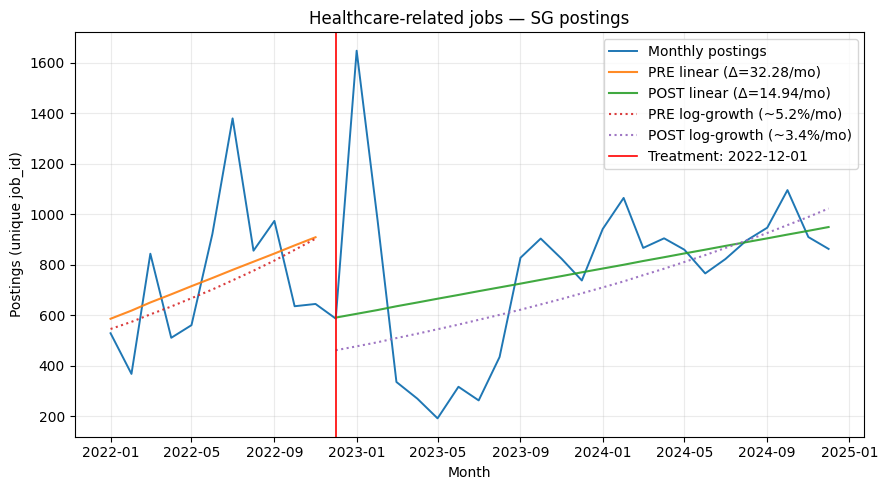

In [117]:
healthcare_low_onets = ['29-1141.01', '29-1229.01', '29-2042.00', '29-2061.00', '29-2012.00', '29-2011.00', '29-1051.00', '29-2052.00', '29-1123.00', '29-1071.00', '29-1218.00', '29-2043.00', '29-2081.00', '29-1122.00']

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(healthcare_low_onets)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=healthcare_low_onets,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='Healthcare-related jobs — SG postings'
)

Mean AI Exposure Score: 0.27634331814019314


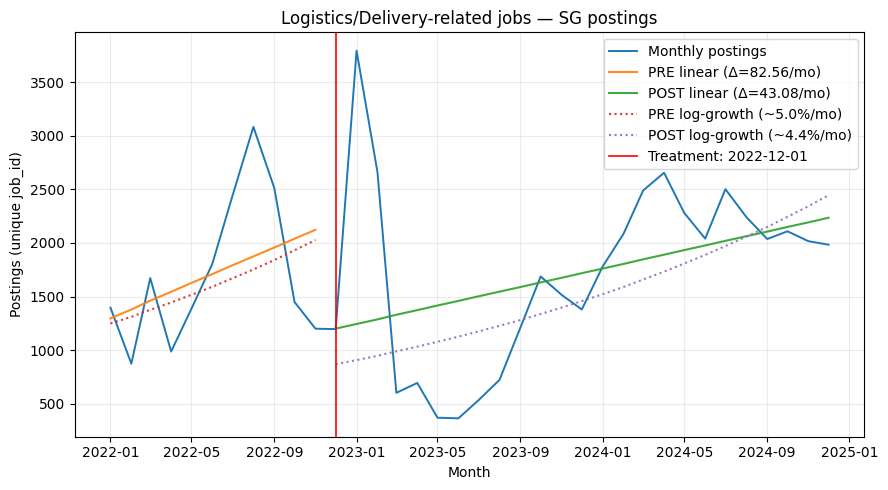

In [ ]:
logistics_low_onets = [
    '53-3033.00',  # Light Truck Drivers
    '43-5071.00',  # Shipping, Receiving, and Inventory Clerks
    '53-7065.00',  # Stockers and Order Fillers
    '53-7064.00',  # Packers and Packagers, Hand
    '53-1043.00',  # First-Line Supervisors of Material-Moving Machine Operators
    '43-5011.00',  # Cargo and Freight Agents
    '53-3053.00',  # Shuttle Drivers and Chauffeurs
    '53-3054.00',  # Taxi Drivers
]

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(logistics_low_onets)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=logistics_low_onets,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='Logistics/Delivery-related jobs — SG postings'
)

Mean AI Exposure Score: 0.14640740700421145


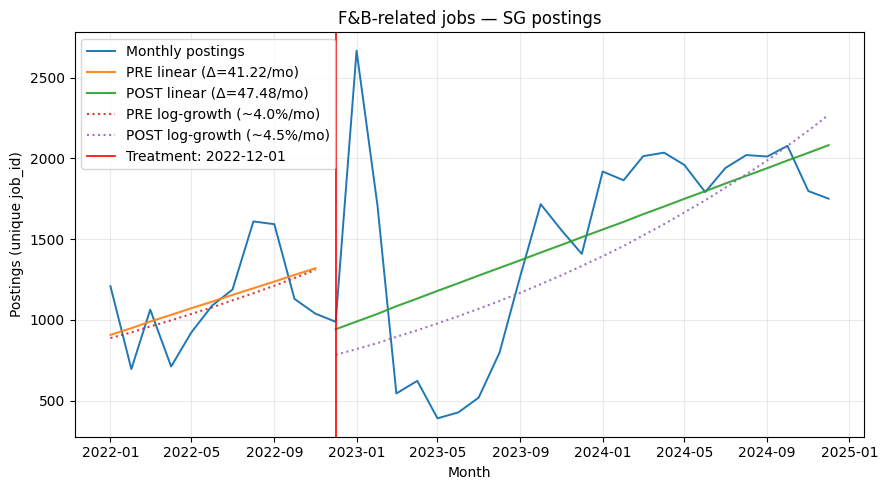

In [118]:
fb_low_onets = [
    '35-1011.00',  # Chefs and Head Cooks
    '35-1012.00',  # First-Line Supervisors of Food Preparation and Serving Workers
    '35-2014.00',  # Cooks, Restaurant
    '35-2015.00',  # Cooks, Short Order
    '35-2021.00',  # Food Preparation Workers
    '35-3023.00',  # Fast Food and Counter Workers
    '35-3023.01',  # Baristas
    '35-3031.00',  # Waiters and Waitresses
    '35-3041.00',  # Food Servers, Nonrestaurant
    '35-9031.00',  # Hosts and Hostesses
    '35-9021.00',  # Dishwashers
]

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(fb_low_onets)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=fb_low_onets,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='F&B-related jobs — SG postings'
)

Mean AI Exposure Score: 0.14205338242971105


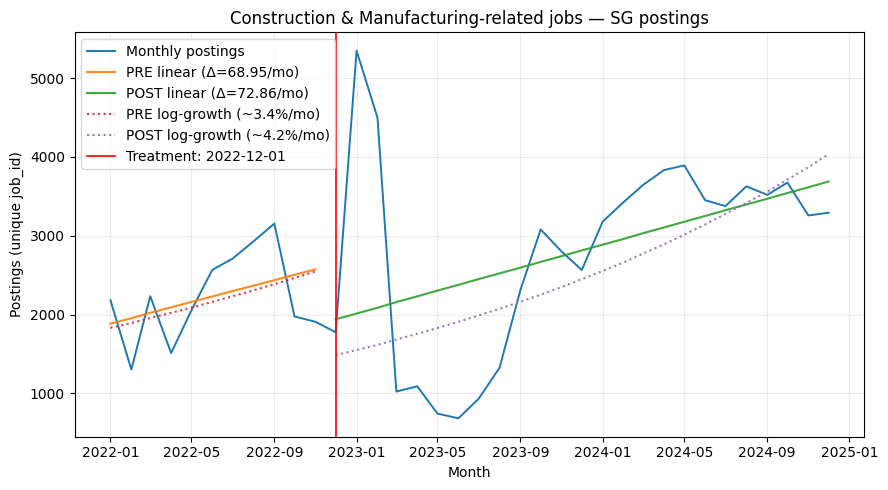

In [135]:
construction_low = [
    '11-9021.00',  # Construction Managers
    '47-1011.00',  # First-Line Supervisors of Construction Trades
    '47-1011.03',  # Solar Energy Installation Managers
    '47-2053.00',  # Terrazzo Workers and Finishers
    '47-2071.00',  # Paving, Surfacing, and Tamping Equipment Operators
    '47-2111.00',  # Electricians
    '47-2152.00',  # Plumbers, Pipefitters, and Steamfitters
    '47-3012.00',  # Helpers--Carpenters
    '47-4011.01',  # Energy Auditors
    '47-4071.00',  # Septic Tank Servicers and Sewer Pipe Cleaners
    '47-4099.03',  # Weatherization Installers and Technicians
    '47-5012.00',  # Rotary Drill Operators, Oil and Gas
    '47-5013.00',  # Service Unit Operators, Oil and Gas
    '47-5041.00',  # Continuous Mining Machine Operators
    '49-1011.00',  # First-Line Supervisors of Mechanics, Installers, and Repairers
    '49-2011.00',  # Computer, Automated Teller, and Office Machine Repairers
    '49-3011.00',  # Aircraft Mechanics and Service Technicians
    '49-3093.00',  # Tire Repairers and Changers
    '49-9011.00',  # Mechanical Door Repairers
    '49-9012.00',  # Control and Valve Installers and Repairers, Except Mechanical Door
    '49-9041.00',  # Industrial Machinery Mechanics
    '49-9043.00',  # Maintenance Workers, Machinery
    '49-9044.00',  # Millwrights
    '49-9052.00',  # Telecommunications Line Installers and Repairers
    '49-9064.00',  # Watch and Clock Repairers
    '49-9071.00',  # Maintenance and Repair Workers, General
]

manufacturing_low = [
    '51-1011.00',  # First-Line Supervisors of Production and Operating Workers
    '51-2011.00',  # Aircraft Structure, Surfaces, Rigging, and Systems Assemblers
    '51-2022.00',  # Electrical and Electronic Equipment Assemblers
    '51-2023.00',  # Electromechanical Equipment Assemblers
    '51-3011.00',  # Bakers
    '51-3021.00',  # Butchers and Meat Cutters
    '51-4041.00',  # Machinists
    '51-4051.00',  # Metal-Refining Furnace Operators and Tenders
    '51-4081.00',  # Multiple Machine Tool Setters, Operators, and Tenders
    '51-5111.00',  # Prepress Technicians and Workers
    '51-6031.00',  # Sewing Machine Operators
    '51-6061.00',  # Textile Bleaching and Dyeing Machine Operators and Tenders
    '51-6092.00',  # Fabric and Apparel Patternmakers
    '51-8013.00',  # Power Plant Operators
    '51-8021.00',  # Stationary Engineers and Boiler Operators
    '51-8099.01',  # Biofuels Processing Technicians
    '51-9051.00',  # Furnace, Kiln, Oven, Drier, and Kettle Operators and Tenders
    '51-9061.00',  # Inspectors, Testers, Sorters, Samplers, and Weighers
    '51-9082.00',  # Medical Appliance Technicians
    '51-9083.00',  # Ophthalmic Laboratory Technicians
    '51-9151.00',  # Photographic Process Workers and Processing Machine Operators
    '51-9197.00',  # Tire Builders
    '51-9198.00',  # Helpers--Production Workers
    '51-4121.00',  # Welders, Cutters, Solderers, and Brazers
]


construction_manufacturing_low = construction_low + manufacturing_low

print("Mean AI Exposure Score:", exposure_df[exposure_df['O*NET-SOC Code'].isin(construction_manufacturing_low)]['average_rating_beta'].mean())

ts = plot_onet_series_prepost(
    scored_df_2022_onwards,
    onet_codes=construction_manufacturing_low,
    treatment_date='2022-12-01',
    count_unique_jobid=True,      # use unique job_id per month
    show_log_growth_trend=True,   # show % growth trend
    title='Construction & Manufacturing-related jobs — SG postings'
)

# Quintiles

In [52]:
# 1) Create exposure quintiles at the ONET level (avoids time/entity weighting)
exp_levels = (panel[['onet_code','ai_exposure']]
              .drop_duplicates('onet_code')
              .dropna(subset=['ai_exposure'])
              .copy())

# Q1 = lowest exposure, Q5 = highest exposure
exp_levels['exp_q'] = pd.qcut(
    exp_levels['ai_exposure'],
    5,
    labels=['Q1','Q2','Q3','Q4','Q5'],
    duplicates='drop'  # handles ties in small samples
)

# 2) Merge quintiles back to panel
panel = panel.merge(exp_levels[['onet_code','exp_q']], on='onet_code', how='left')

# 3) Interaction dummies: Post × Quintile (Q1 is the reference)
for q in ['Q2','Q3','Q4','Q5']:
    panel[f'{q}_x_post'] = ((panel['exp_q'] == q).astype(int)) * panel['post']

# (Optional) keep a clean label for plots/diagnostics
panel['exp_q'] = pd.Categorical(panel['exp_q'], categories=['Q1','Q2','Q3','Q4','Q5'], ordered=True)

# 4) Outcome
panel['log_postings'] = np.log1p(panel['postings'])

# 5) Diagnostics
print("\n=== Quintile counts (pre/post) ===")
print(panel.groupby(['exp_q','post']).size().unstack(fill_value=0))

print("\n=== Exposure by quintile (ONET-level) ===")
print(exp_levels.groupby('exp_q')['ai_exposure'].agg(['count','min','median','max']).round(4))

# 6) Build entity id and index
panel['entity_id'] = panel['onet_code'].astype(str) + '_' + panel['rics_k50'].astype(str)
panel_indexed = panel.set_index(['entity_id','month'])

# 7) Run TWFE DiD with Q1 as baseline (omit Q1×Post); cluster by entity
exog_cols = ['Q2_x_post','Q3_x_post','Q4_x_post','Q5_x_post']
model_q = PanelOLS(
    panel_indexed['log_postings'],
    panel_indexed[exog_cols],
    entity_effects=True,
    time_effects=True
).fit(cov_type='clustered', cluster_entity=True)

print("\n=== DiD with Post × Exposure Quintiles (Q1 baseline) ===")
print(model_q)


=== Quintile counts (pre/post) ===
post       0      1
exp_q              
Q1     88550  96250
Q2     87400  95000
Q3     87400  95000
Q4     87400  95000
Q5     88550  96250

=== Exposure by quintile (ONET-level) ===
       count     min  median     max
exp_q                               
Q1        77  0.0000  0.1048  0.2097
Q2        76  0.2115  0.2962  0.3846
Q3        76  0.3879  0.4375  0.4808
Q4        76  0.4818  0.5285  0.5625
Q5        77  0.5641  0.6417  0.8600


C:\Users\teomi\AppData\Local\Temp\ipykernel_49748\1282366207.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(panel.groupby(['exp_q','post']).size().unstack(fill_value=0))
C:\Users\teomi\AppData\Local\Temp\ipykernel_49748\1282366207.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(exp_levels.groupby('exp_q')['ai_exposure'].agg(['count','min','median','max']).round(4))



=== DiD with Post × Exposure Quintiles (Q1 baseline) ===
                          PanelOLS Estimation Summary                           
Dep. Variable:           log_postings   R-squared:                        0.0008
Estimator:                   PanelOLS   R-squared (Between):              0.0184
No. Observations:              916800   R-squared (Within):               0.0069
Date:                Wed, Oct 29 2025   R-squared (Overall):              0.0161
Time:                        14:24:20   Log-likelihood                -4.812e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      176.32
Entities:                       19100   P-value                           0.0000
Avg Obs:                       48.000   Distribution:                F(4,897649)
Min Obs:                       48.000                                           
Max Obs:                       48.000   F-statistic

C:\Users\teomi\AppData\Local\Temp\ipykernel_49748\352455962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q_month = (panel


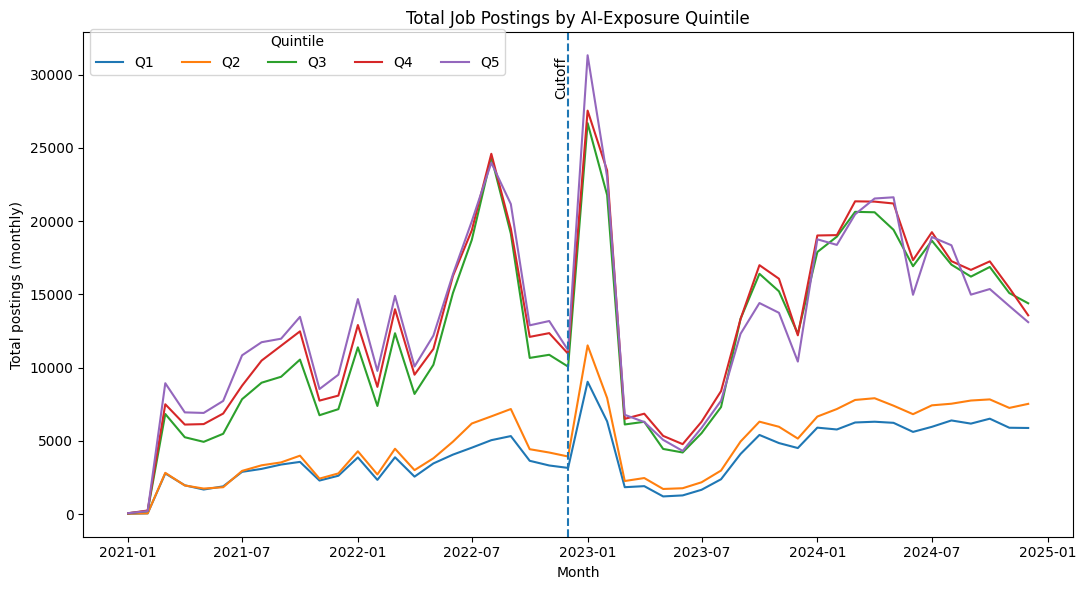

In [42]:
# --- 1) Aggregate total postings by quintile × month ---
q_month = (panel
           .groupby(['exp_q','month'], as_index=False)['postings']
           .sum()
           .sort_values('month'))

# Pivot to wide for easy plotting
q_wide = q_month.pivot(index='month', columns='exp_q', values='postings')\
                .reindex(columns=['Q1','Q2','Q3','Q4','Q5'])  # consistent order

# --- 2) (Optional) smooth a bit to reduce noise (comment out if not desired) ---
# q_wide = q_wide.rolling(window=3, min_periods=1).mean()

# --- 3) Plot raw totals over time ---
plt.figure(figsize=(11,6))
for q in q_wide.columns:
    plt.plot(q_wide.index, q_wide[q], label=q)

# Vertical line at treatment cutoff if you've defined it earlier
# e.g. cutoff = pd.Timestamp('2022-12-01')
try:
    cutoff
    plt.axvline(cutoff, linestyle='--')
    plt.text(cutoff, plt.ylim()[1]*0.95, 'Cutoff', rotation=90, va='top', ha='right')
except NameError:
    pass

plt.title('Total Job Postings by AI-Exposure Quintile')
plt.xlabel('Month')
plt.ylabel('Total postings (monthly)')
plt.legend(title='Quintile', ncol=5, loc='upper left', bbox_to_anchor=(0,1.02))
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from linearmodels import PanelOLS

TRUE_TREATMENT = pd.Timestamp('2022-12-01')

# --- 1) Keep pre-period only ---
pre = panel.loc[panel['month'] < TRUE_TREATMENT].copy()

# --- 2) Build a centered linear time index t (in months) ---
# t = 0 at the median pre month; improves numeric stability and interpretability
pre = pre.sort_values('month')
unique_months = np.sort(pre['month'].unique())
month_to_int = {m:i for i, m in enumerate(unique_months)}
pre['t_raw'] = pre['month'].map(month_to_int).astype(float)
pre['t'] = pre['t_raw'] - pre['t_raw'].median()

# Optional: express slope "per year" instead of per month:
# pre['t'] = pre['t'] / 12.0

# --- 3) Build t × Quintile interactions (Q1 baseline) ---
for q in ['Q2','Q3','Q4','Q5']:
    pre[f't_x_{q}'] = pre['t'] * (pre['exp_q'] == q).astype(int)

# --- 4) Index for PanelOLS ---
pre_idx = pre.set_index(['entity_id','month'])

# Exogenous columns: common trend + differential trends vs Q1
Xcols = ['t', 't_x_Q2', 't_x_Q3', 't_x_Q4', 't_x_Q5']

# --- 5) Prior-trends regression: entity FE only (no month FE) ---
res_trends = PanelOLS(
    pre_idx['log_postings'],
    pre_idx[Xcols],
    entity_effects=True,
    time_effects=False
).fit(cov_type='clustered', cluster_entity=True)

print("\n=== Prior Trends Test (pre-period only) ===")
print(res_trends.summary)

# --- 6) Joint test: are all differential slopes zero? (Q2..Q5 jointly) ---
L = np.zeros((4, len(Xcols)))
# columns are [t, t_x_Q2, t_x_Q3, t_x_Q4, t_x_Q5]
L[:, 1:] = np.eye(4)   # test t_x_Q2 .. t_x_Q5 = 0 jointly
wald = res_trends.wald_test(L)
print("\nJoint test (Q2..Q5 slopes = 0): p-value =", float(wald.pval))


=== Prior Trends Test (pre-period only) ===
                          PanelOLS Estimation Summary                           
Dep. Variable:           log_postings   R-squared:                        0.0691
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:              439300   R-squared (Within):               0.0691
Date:                Wed, Oct 29 2025   R-squared (Overall):              0.0154
Time:                        13:52:09   Log-likelihood                -2.162e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6234.8
Entities:                       19100   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                F(5,420195)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):   